<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

# Victor Jong Soon Peng, S10186045H, P01

In [1]:
# Import the Required Packages

# Keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image
# ImageDataGenerator went into the folder, get the images and turn them into vectors
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Plotting
import matplotlib.pyplot as plt

# Working with files
import os

# numpy
import numpy as np

## Step 1: Data Loading

In [2]:
# Base directory where all the images are stored
base_dir = 'C:/Users/victo/Desktop/Semester 3.2/DEEP LEARNING/Assignment 1/workspace'

# Training directory where all the training images are stored
train_dir = os.path.join(base_dir, 'train')

# Validation directory where all the validation images are stored
validation_dir = os.path.join(base_dir, 'validation')

# Testing directory where all the testing images are stored
test_dir = os.path.join(base_dir, 'test')

## Step 2:  Develop the Image Classification Models

### Model #1 (Build from Scratch)

#### 1 Convolutional and 1 Dense Layer

In [ ]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten 
model.add(layers.Flatten())

# 1st Dense Network
model.add(layers.Dense(512, activation='relu'))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               89719296  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 89,725,322
Trainable params: 89,725,322
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [6]:
# ImageDataGenerator turn all the images into vectors
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [8]:
# Train the Model
# steps per epoch is 100 because we are training 20 per epoch in the generator (100 * 20 = 2000)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 15s 151ms/step - loss: 7.2056 - acc: 0.2095 - val_loss: 2.0928 - val_acc: 0.2640
Epoch 2/30
100/100 [==============================] - 14s 140ms/step - loss: 1.8910 - acc: 0.3685 - val_loss: 2.2066 - val_acc: 0.2580
Epoch 3/30
100/100 [==============================] - 14s 143ms/step - loss: 1.6811 - acc: 0.4670 - val_loss: 2.0736 - val_acc: 0.3070
Epoch 4/30
100/100 [==============================] - 14s 141ms/step - loss: 1.3853 - acc: 0.5645 - val_loss: 2.2201 - val_acc: 0.3090
Epoch 5/30
100/100 [==============================] - 14s 145ms/step - loss: 1.1590 - acc: 0.6600 - val_loss: 2.1631 - val_acc: 0.3250
Epoch 6/30
100/100 [==============================] - 14s 138ms/step - loss: 1.1452 - acc: 0.6685 - val_loss: 2.1638 - val_acc: 0.3320
Epoch 7/30
100/100 [=

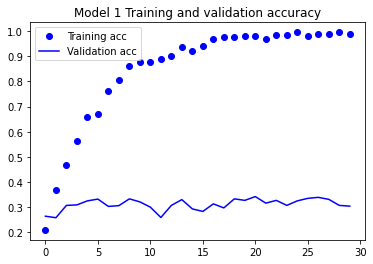

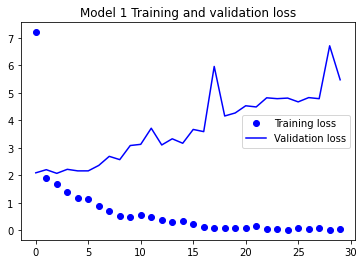

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 1 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 1 Training and validation loss')
plt.legend()

plt.show()

In [10]:
# Save the Model
model.save('food_model_1.h5')

### Model #2

#### 2 Convolutional and 1 Dense Layer

In [11]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

#2nd Convolutional Network
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten
model.add(layers.Flatten())

# 1st Dense Network
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               21234176  
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [13]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [14]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [16]:
# Train the Model
# steps per epoch is 100 because we are training 20 per epoch in the generator (100 * 20 = 2000)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 15s 152ms/step - loss: 2.4391 - acc: 0.1650 - val_loss: 2.1127 - val_acc: 0.2360
Epoch 2/30
100/100 [==============================] - 14s 137ms/step - loss: 1.9761 - acc: 0.3070 - val_loss: 1.9599 - val_acc: 0.2910
Epoch 3/30
100/100 [==============================] - 14s 141ms/step - loss: 1.7830 - acc: 0.4000 - val_loss: 1.8890 - val_acc: 0.3450
Epoch 4/30
100/100 [==============================] - 14s 137ms/step - loss: 1.6355 - acc: 0.4475 - val_loss: 1.9646 - val_acc: 0.3330
Epoch 5/30
100/100 [==============================] - 14s 137ms/step - loss: 1.4723 - acc: 0.5175 - val_loss: 1.8638 - val_acc: 0.3590
Epoch 6/30
100/100 [==============================] - 13s 135ms/step - loss: 1.2722 - acc: 0.5965 - val_loss: 1.9839 - val_acc: 0.3540
Epoch 7/30
100/100 [==============================] - 14s 142ms/step - loss: 1.1832 - acc: 0.6275

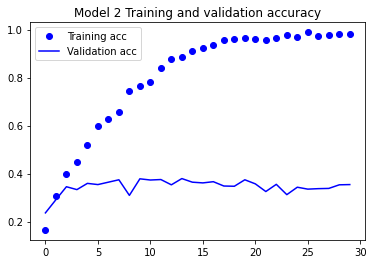

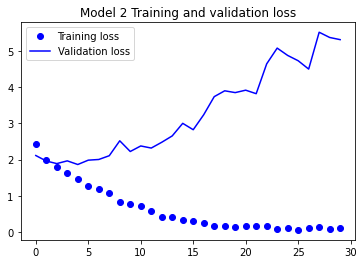

In [17]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 2 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 2 Training and validation loss')
plt.legend()

plt.show()

In [18]:
# Save the Model
model.save('food_model_2.h5')

### Model #3

#### 3 Convolutional and 1 Dense Layer

In [19]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

#2nd Convolutional Network
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

#3rd Convolutional Network
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten
model.add(layers.Flatten())

# 1st Dense Network
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9248)             

In [21]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [22]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [24]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 15s 149ms/step - loss: 2.4284 - acc: 0.1545 - val_loss: 2.1030 - val_acc: 0.2540
Epoch 2/30
100/100 [==============================] - 13s 135ms/step - loss: 2.0149 - acc: 0.2970 - val_loss: 2.0462 - val_acc: 0.2870
Epoch 3/30
100/100 [==============================] - 13s 134ms/step - loss: 1.9112 - acc: 0.3350 - val_loss: 1.9116 - val_acc: 0.3020
Epoch 4/30
100/100 [==============================] - 13s 135ms/step - loss: 1.7705 - acc: 0.3775 - val_loss: 1.9697 - val_acc: 0.2930
Epoch 5/30
100/100 [==============================] - 14s 142ms/step - loss: 1.6999 - acc: 0.3985 - val_loss: 1.7575 - val_acc: 0.3740
Epoch 6/30
100/100 [==============================] - 14s 136ms/step - loss: 1.6076 - acc: 0.4480 - val_loss: 1.9810 - val_acc: 0.3380
Epoch 7/30
100/100 [==============================] - 13s 135ms/step - loss: 1.4593 - acc: 0.5110

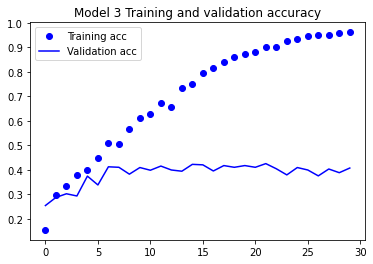

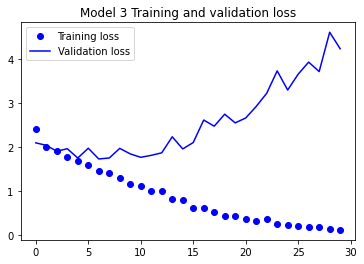

In [25]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 3 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 3 Training and validation loss')
plt.legend()

plt.show()

In [26]:
# Save the Model
model.save('food_model_3.h5')

### Model #4

#### 4 Convolutional and 1 Dense Layer

In [27]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Network
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Network
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 4th Convolutional Network
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

# 1st Dense Network
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 32)       

In [29]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [30]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [31]:
# Plot the Training and Validation Accuracy & Loss Scores
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [32]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 14s 145ms/step - loss: 2.2370 - acc: 0.1845 - val_loss: 2.0625 - val_acc: 0.2440
Epoch 2/30
100/100 [==============================] - 13s 135ms/step - loss: 2.0395 - acc: 0.2700 - val_loss: 2.0165 - val_acc: 0.2840
Epoch 3/30
100/100 [==============================] - 14s 135ms/step - loss: 1.9475 - acc: 0.3000 - val_loss: 1.8751 - val_acc: 0.3400
Epoch 4/30
100/100 [==============================] - 14s 141ms/step - loss: 1.8550 - acc: 0.3440 - val_loss: 1.8605 - val_acc: 0.3560
Epoch 5/30
100/100 [==============================] - 14s 135ms/step - loss: 1.8362 - acc: 0.3610 - val_loss: 1.7724 - val_acc: 0.3690
Epoch 6/30
100/100 [==============================] - 14s 135ms/step - loss: 1.7407 - acc: 0.3815 - val_loss: 1.7344 - val_acc: 0.3740
Epoch 7/30
100/100 [==============================] - 13s 135ms/step - loss: 1.7169 - acc: 0.3880

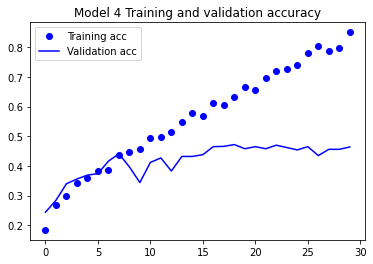

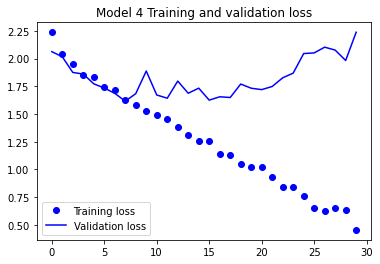

In [33]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 4 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 4 Training and validation loss')
plt.legend()

plt.show()

In [34]:
# Save the Model
model.save('food_model_4.h5')

### Model #5

#### 5 Convolutional and 1 Dense Layer

In [22]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Network
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Network
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 4th Convolutional Network
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 5th Convolutional Network
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten
model.add(layers.Flatten())

# 1st Dense Network
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 32)       

In [24]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [25]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [26]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [27]:
# Train the Model
# steps per epoch is 100 because we are training 20 per epoch in the generator (100 * 20 = 2000)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 18s 179ms/step - loss: 2.2778 - acc: 0.1425 - val_loss: 2.1664 - val_acc: 0.2040
Epoch 2/100
100/100 [==============================] - 14s 145ms/step - loss: 2.0999 - acc: 0.2530 - val_loss: 2.1017 - val_acc: 0.2660
Epoch 3/100
100/100 [==============================] - 14s 140ms/step - loss: 2.0479 - acc: 0.2745 - val_loss: 2.0332 - val_acc: 0.2780
Epoch 4/100
100/100 [==============================] - 14s 145ms/step - loss: 1.9605 - acc: 0.3035 - val_loss: 1.9080 - val_acc: 0.3060
Epoch 5/100
100/100 [==============================] - 14s 136ms/step - loss: 1.8667 - acc: 0.3275 - val_loss: 1.8982 - val_acc: 0.3040
Epoch 6/100
100/100 [==============================] - 14s 136ms/step - loss: 1.8552 - acc: 0.3350 - val_loss: 1.7609 - val_acc: 0.3690
Epoch 7/100
100

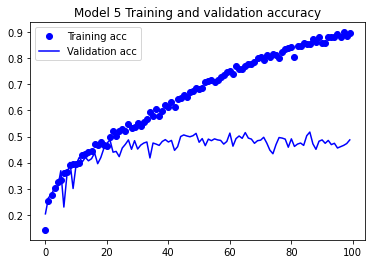

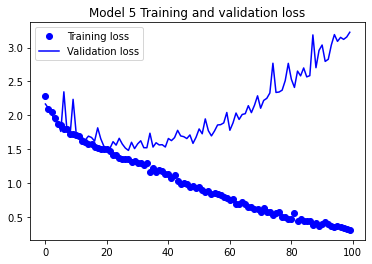

In [28]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 5 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 5 Training and validation loss')
plt.legend()

plt.show()

In [29]:
# Save the Model
model.save('food_model_5.h5')

### Model #6

#### 5 Convolutional (Increased Nodes) and 1 Dense Layer

In [54]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Network
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 4th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 5th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten
model.add(layers.Flatten())

# 1st Dense Network
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 128)      

In [56]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [57]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [58]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [59]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 16s 157ms/step - loss: 2.3100 - acc: 0.1395 - val_loss: 2.2112 - val_acc: 0.1890
Epoch 2/100
100/100 [==============================] - 14s 141ms/step - loss: 2.1706 - acc: 0.2210 - val_loss: 2.1401 - val_acc: 0.1810
Epoch 3/100
100/100 [==============================] - 14s 139ms/step - loss: 2.0583 - acc: 0.2665 - val_loss: 1.9744 - val_acc: 0.3070
Epoch 4/100
100/100 [==============================] - 14s 138ms/step - loss: 1.9731 - acc: 0.3060 - val_loss: 1.8626 - val_acc: 0.3270
Epoch 5/100
100/100 [==============================] - 14s 138ms/step - loss: 1.9133 - acc: 0.3190 - val_loss: 1.8542 - val_acc: 0.3430
Epoch 6/100
100/100 [==============================] - 14s 142ms/step - loss: 1.8568 - acc: 0.3435 - val_loss: 2.1467 - val_acc: 0.2680
Epoch 7/100
100/100 [==============================] - 14s 138ms/step - loss: 1.8062 - acc:

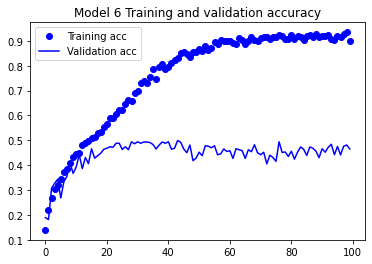

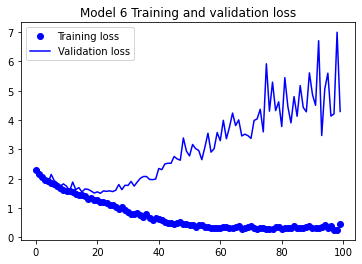

In [60]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 6 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 6 Training and validation loss')
plt.legend()

plt.show()

In [61]:
# Save the Model
model.save('food_model_6.h5')

### Model #7

#### 4 Convolutional (Increased Nodes) and 1 Dense Layer

In [62]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Network
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 4th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten
model.add(layers.Flatten())

# 1st Dense Network
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [63]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 15, 15, 128)      

In [64]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [65]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [66]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [67]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 16s 156ms/step - loss: 2.3534 - acc: 0.1275 - val_loss: 2.1881 - val_acc: 0.2240
Epoch 2/100
100/100 [==============================] - 15s 147ms/step - loss: 2.1217 - acc: 0.2395 - val_loss: 2.0505 - val_acc: 0.2660
Epoch 3/100
100/100 [==============================] - 14s 141ms/step - loss: 1.9897 - acc: 0.2945 - val_loss: 2.0512 - val_acc: 0.2670
Epoch 4/100
100/100 [==============================] - 14s 142ms/step - loss: 1.8855 - acc: 0.3410 - val_loss: 1.8703 - val_acc: 0.3400
Epoch 5/100
100/100 [==============================] - 15s 147ms/step - loss: 1.7897 - acc: 0.3720 - val_loss: 1.9968 - val_acc: 0.2830
Epoch 6/100
100/100 [==============================] - 14s 139ms/step - loss: 1.7529 - acc: 0.4035 - val_loss: 1.6990 - val_acc: 0.4130
Epoch 7/100
100/100 [==============================] - 14s 140ms/step - loss: 1.6276 - acc:

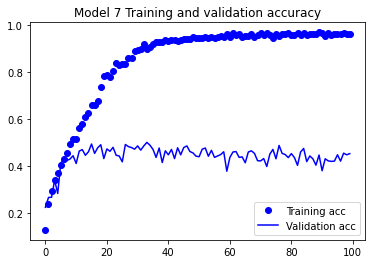

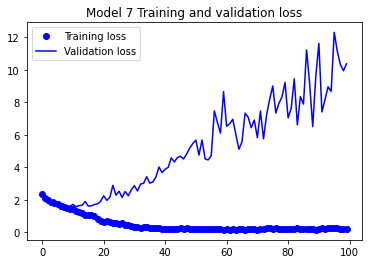

In [68]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 7 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 7 Training and validation loss')
plt.legend()

plt.show()

In [69]:
# Save the Model
model.save('food_model_7.h5')

### Model #8

#### 5 Convolutional (Increased Nodes) and 2 Dense Layer

In [86]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Network
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 4th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 5th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten
model.add(layers.Flatten())

# 1st Dense Network
model.add(layers.Dense(256, activation='relu'))

# 2nd Dense Network
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [87]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 15, 15, 128)      

In [88]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [89]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [90]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [91]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 16s 158ms/step - loss: 2.3413 - acc: 0.1015 - val_loss: 2.2670 - val_acc: 0.1130
Epoch 2/100
100/100 [==============================] - 14s 143ms/step - loss: 2.2420 - acc: 0.1690 - val_loss: 2.1411 - val_acc: 0.1770
Epoch 3/100
100/100 [==============================] - 14s 144ms/step - loss: 2.1339 - acc: 0.2290 - val_loss: 2.1631 - val_acc: 0.2160
Epoch 4/100
100/100 [==============================] - 14s 144ms/step - loss: 2.0581 - acc: 0.2525 - val_loss: 1.9817 - val_acc: 0.3000
Epoch 5/100
100/100 [==============================] - 15s 148ms/step - loss: 1.9981 - acc: 0.2905 - val_loss: 2.0331 - val_acc: 0.2530
Epoch 6/100
100/100 [==============================] - 14s 143ms/step - loss: 1.9285 - acc: 0.2850 - val_loss: 1.8379 - val_acc: 0.3440
Epoch 7/100
100/100 [==============================] - 14s 143ms/step - loss: 1.9317 - acc:

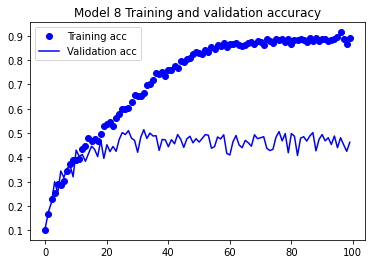

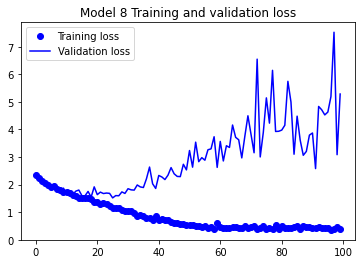

In [92]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 8 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 8 Training and validation loss')
plt.legend()

plt.show()

In [93]:
# Save the Model
model.save('food_model_8.h5')

### Model #9

#### 5 Convolutional (Increased Nodes) and 2 Dense Layer + Data Augmentation

In [3]:
# Data Augmentation
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

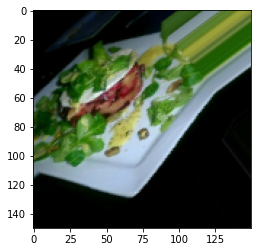

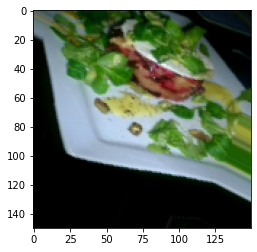

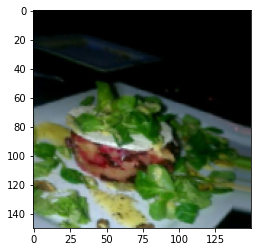

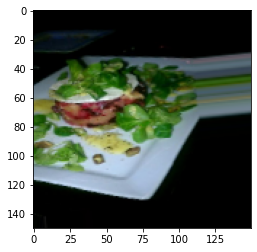

In [10]:
# Example of data augmentation
img_size = 150
train_beef_salad_dir = os.path.join(base_dir, 'train/beet_salad')

fnames = [os.path.join(train_beef_salad_dir, fname) for fname in os.listdir(train_beef_salad_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(img_size, img_size))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        

plt.show()

In [11]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Network
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 4th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 5th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

# 1st Dense Network
model.add(layers.Dense(256, activation='relu'))

# 2nd Dense Network
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [13]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [14]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [16]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/200
100/100 [==============================] - 25s 254ms/step - loss: 2.3105 - acc: 0.1200 - val_loss: 2.2536 - val_acc: 0.1860
Epoch 2/200
100/100 [==============================] - 25s 245ms/step - loss: 2.2417 - acc: 0.1700 - val_loss: 2.2394 - val_acc: 0.1780
Epoch 3/200
100/100 [==============================] - 25s 251ms/step - loss: 2.1991 - acc: 0.1960 - val_loss: 2.1134 - val_acc: 0.2010
Epoch 4/200
100/100 [==============================] - 24s 245ms/step - loss: 2.1169 - acc: 0.2370 - val_loss: 2.0811 - val_acc: 0.2340
Epoch 5/200
100/100 [==============================] - 24s 244ms/step - loss: 2.0526 - acc: 0.2460 - val_loss: 1.9245 - val_acc: 0.2940
Epoch 6/200
100/100 [==============================] - 24s 242ms/step - loss: 2.0302 - acc: 0.2690 - val_loss: 1.8447 - val_acc: 0.3380
Epoch 7/200
100

Epoch 117/200
100/100 [==============================] - 24s 235ms/step - loss: 1.4528 - acc: 0.5430 - val_loss: 1.1865 - val_acc: 0.6000
Epoch 118/200
100/100 [==============================] - 24s 236ms/step - loss: 1.4881 - acc: 0.5315 - val_loss: 1.6215 - val_acc: 0.4560
Epoch 119/200
100/100 [==============================] - 24s 241ms/step - loss: 1.4561 - acc: 0.5275 - val_loss: 1.8487 - val_acc: 0.5150
Epoch 120/200
100/100 [==============================] - 24s 237ms/step - loss: 1.6557 - acc: 0.5350 - val_loss: 1.2521 - val_acc: 0.5730
Epoch 121/200
100/100 [==============================] - 24s 236ms/step - loss: 1.4421 - acc: 0.5435 - val_loss: 1.2527 - val_acc: 0.5990
Epoch 122/200
100/100 [==============================] - 24s 241ms/step - loss: 1.4309 - acc: 0.5245 - val_loss: 1.6467 - val_acc: 0.5300
Epoch 123/200
100/100 [==============================] - 24s 237ms/step - loss: 1.5137 - acc: 0.5150 - val_loss: 1.3015 - val_acc: 0.5690
Epoch 124/200
100/100 [===========

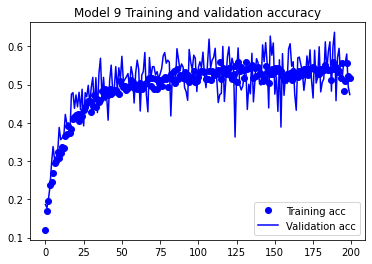

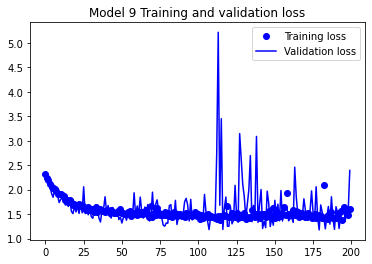

In [19]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 9 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 9 Training and validation loss')
plt.legend()

plt.show()

In [18]:
# Save the Model
model.save('food_model_9.h5')

### Model #10

#### 5 Convolutional (Increased Nodes) and 2 Dense Layer + Data Augmentation + Dropout

In [33]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Network
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 4th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 5th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten
model.add(layers.Flatten())

# Add Dropout
model.add(layers.Dropout(0.5))

# 1st Dense Network
model.add(layers.Dense(256, activation='relu'))

# 2nd Dense Network
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 15, 15, 128)      

In [35]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [36]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [37]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [38]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/200
100/100 [==============================] - 25s 252ms/step - loss: 2.3065 - acc: 0.1040 - val_loss: 2.2949 - val_acc: 0.1250
Epoch 2/200
100/100 [==============================] - 24s 241ms/step - loss: 2.2740 - acc: 0.1360 - val_loss: 2.3949 - val_acc: 0.1610
Epoch 3/200
100/100 [==============================] - 24s 237ms/step - loss: 2.2182 - acc: 0.1785 - val_loss: 2.1611 - val_acc: 0.1810
Epoch 4/200
100/100 [==============================] - 24s 238ms/step - loss: 2.2052 - acc: 0.1880 - val_loss: 2.1505 - val_acc: 0.2020
Epoch 5/200
100/100 [==============================] - 24s 238ms/step - loss: 2.1592 - acc: 0.2110 - val_loss: 2.0613 - val_acc: 0.2290
Epoch 6/200
100/100 [==============================] - 24s 241ms/step - loss: 2.1492 - acc: 0.2255 - val_loss: 2.0890 - val_acc: 0.2310
Epoch 7/200
100/100 [==============================] - 24s 238ms/step - loss: 2.1132 - acc:

Epoch 119/200
100/100 [==============================] - 28s 280ms/step - loss: 1.6495 - acc: 0.4700 - val_loss: 1.5855 - val_acc: 0.4540
Epoch 120/200
100/100 [==============================] - 30s 299ms/step - loss: 1.7088 - acc: 0.4590 - val_loss: 1.5749 - val_acc: 0.4710
Epoch 121/200
100/100 [==============================] - 25s 255ms/step - loss: 1.6661 - acc: 0.4595 - val_loss: 1.4828 - val_acc: 0.4840
Epoch 122/200
100/100 [==============================] - 25s 245ms/step - loss: 1.6497 - acc: 0.4685 - val_loss: 1.4416 - val_acc: 0.5310
Epoch 123/200
100/100 [==============================] - 26s 259ms/step - loss: 1.6090 - acc: 0.4725 - val_loss: 1.5434 - val_acc: 0.4540
Epoch 124/200
100/100 [==============================] - 29s 286ms/step - loss: 1.7341 - acc: 0.4605 - val_loss: 1.7397 - val_acc: 0.4170
Epoch 125/200
100/100 [==============================] - 25s 251ms/step - loss: 1.6637 - acc: 0.4650 - val_loss: 1.5960 - val_acc: 0.4480
Epoch 126/200
100/100 [===========

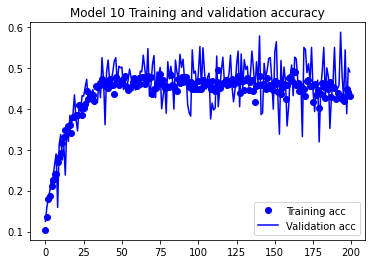

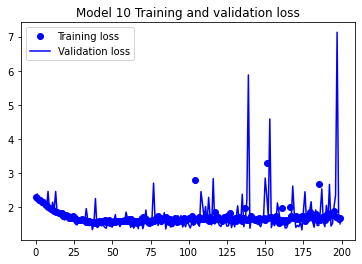

In [39]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 10 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 10 Training and validation loss')
plt.legend()

plt.show()

In [40]:
# Save the Model
model.save('food_model_10.h5')

### Model #11

#### 5 Convolutional (Increased Nodes) and 2 Dense Layer + Data Augmentation  Dropout + Learning Rate

In [41]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Network
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 4th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 5th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten
model.add(layers.Flatten())

# Add Dropout
model.add(layers.Dropout(0.5))

# 1st Dense Network
model.add(layers.Dense(256, activation='relu'))

# 2nd Dense Network
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [42]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 15, 15, 128)      

In [43]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              # Add learning rate
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [44]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [45]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [46]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/200
100/100 [==============================] - 25s 249ms/step - loss: 2.3019 - acc: 0.1035 - val_loss: 2.2971 - val_acc: 0.1330
Epoch 2/200
100/100 [==============================] - 24s 237ms/step - loss: 2.2883 - acc: 0.1155 - val_loss: 2.2486 - val_acc: 0.1670
Epoch 3/200
100/100 [==============================] - 24s 242ms/step - loss: 2.2275 - acc: 0.1530 - val_loss: 2.3079 - val_acc: 0.1230
Epoch 4/200
100/100 [==============================] - 24s 238ms/step - loss: 2.1961 - acc: 0.1690 - val_loss: 2.1526 - val_acc: 0.2030
Epoch 5/200
100/100 [==============================] - 24s 237ms/step - loss: 2.1649 - acc: 0.1960 - val_loss: 2.1566 - val_acc: 0.1970
Epoch 6/200
100/100 [==============================] - 24s 241ms/step - loss: 2.1469 - acc: 0.2065 - val_loss: 2.2738 - val_acc: 0.1730
Epoch 7/200
100/100 [==============================] - 24s 239ms/step - loss: 2.1300 - acc:

Epoch 119/200
100/100 [==============================] - 24s 242ms/step - loss: 1.3577 - acc: 0.5065 - val_loss: 1.5943 - val_acc: 0.4970
Epoch 120/200
100/100 [==============================] - 24s 240ms/step - loss: 1.3721 - acc: 0.5230 - val_loss: 1.4588 - val_acc: 0.5430
Epoch 121/200
100/100 [==============================] - 24s 242ms/step - loss: 1.4180 - acc: 0.5060 - val_loss: 1.4727 - val_acc: 0.5010
Epoch 122/200
100/100 [==============================] - 25s 247ms/step - loss: 1.4308 - acc: 0.4985 - val_loss: 1.5334 - val_acc: 0.5020
Epoch 123/200
100/100 [==============================] - 25s 245ms/step - loss: 1.3650 - acc: 0.5410 - val_loss: 1.4317 - val_acc: 0.5050
Epoch 124/200
100/100 [==============================] - 24s 241ms/step - loss: 1.3892 - acc: 0.5165 - val_loss: 1.4282 - val_acc: 0.5210
Epoch 125/200
100/100 [==============================] - 24s 245ms/step - loss: 1.3841 - acc: 0.5155 - val_loss: 1.3046 - val_acc: 0.5560
Epoch 126/200
100/100 [===========

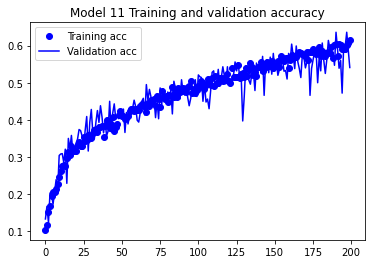

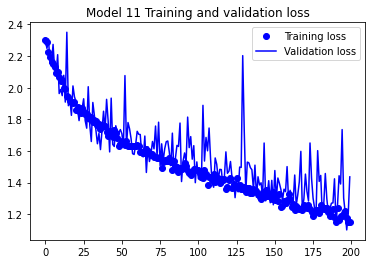

In [47]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 11 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 11 Training and validation loss')
plt.legend()

plt.show()

In [48]:
# Save the Model
model.save('food_model_11.h5')

### Model #12

#### 5 Convolutional (Increased Nodes) and 2 Dense Layer + Data Augmentation  Dropout + Learning Rate + L1 and L2 regularizers

In [49]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Network
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 4th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 5th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten
model.add(layers.Flatten())

# Add Dropout
model.add(layers.Dropout(0.5))

# 1st Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# 2nd Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [50]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 15, 15, 128)      

In [51]:
model.compile(loss='categorical_crossentropy',
              # Add Learning Rate
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [52]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [53]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [54]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/200
100/100 [==============================] - 26s 262ms/step - loss: 11.1739 - acc: 0.0970 - val_loss: 10.2754 - val_acc: 0.1000
Epoch 2/200
100/100 [==============================] - 24s 240ms/step - loss: 9.4720 - acc: 0.1135 - val_loss: 8.6971 - val_acc: 0.1000
Epoch 3/200
100/100 [==============================] - 24s 243ms/step - loss: 8.0282 - acc: 0.1245 - val_loss: 7.3678 - val_acc: 0.1470
Epoch 4/200
100/100 [==============================] - 25s 248ms/step - loss: 6.8682 - acc: 0.1580 - val_loss: 6.3497 - val_acc: 0.1820
Epoch 5/200
100/100 [==============================] - 24s 243ms/step - loss: 5.9886 - acc: 0.1650 - val_loss: 5.6073 - val_acc: 0.1930
Epoch 6/200
100/100 [==============================] - 24s 241ms/step - loss: 5.3203 - acc: 0.1635 - val_loss: 5.0170 - val_acc: 0.2110
Epoch 7/200
100/100 [==============================] - 24s 242ms/step - loss: 4.8119 - ac

Epoch 119/200
100/100 [==============================] - 24s 238ms/step - loss: 1.7568 - acc: 0.4145 - val_loss: 1.8693 - val_acc: 0.4020
Epoch 120/200
100/100 [==============================] - 24s 239ms/step - loss: 1.7732 - acc: 0.4155 - val_loss: 1.7827 - val_acc: 0.4190
Epoch 121/200
100/100 [==============================] - 24s 238ms/step - loss: 1.7522 - acc: 0.4135 - val_loss: 1.7084 - val_acc: 0.4390
Epoch 122/200
100/100 [==============================] - 24s 242ms/step - loss: 1.7441 - acc: 0.4155 - val_loss: 1.7624 - val_acc: 0.4320
Epoch 123/200
100/100 [==============================] - 24s 239ms/step - loss: 1.7688 - acc: 0.3985 - val_loss: 1.7396 - val_acc: 0.4260
Epoch 124/200
100/100 [==============================] - 24s 238ms/step - loss: 1.7457 - acc: 0.4195 - val_loss: 1.7627 - val_acc: 0.4210
Epoch 125/200
100/100 [==============================] - 24s 238ms/step - loss: 1.7588 - acc: 0.4065 - val_loss: 1.6786 - val_acc: 0.4520
Epoch 126/200
100/100 [===========

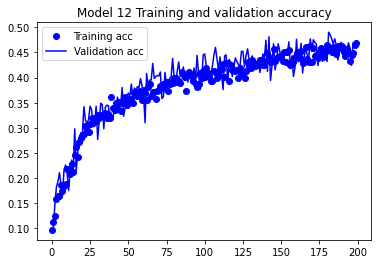

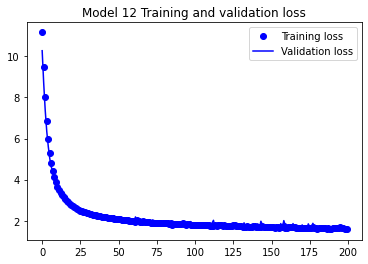

In [55]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 12 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 12 Training and validation loss')
plt.legend()

plt.show()

In [56]:
# Save the Model
model.save('food_model_12.h5')

### Model #13

#### 200 epochs to 400 epochs

In [62]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Network
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 4th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 5th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten
model.add(layers.Flatten())

# Add Dropout
model.add(layers.Dropout(0.5))

# 1st Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# 2nd Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [63]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 15, 15, 128)     

In [64]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              # Add Learning Rate
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [65]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [66]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [67]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/400
100/100 [==============================] - 26s 259ms/step - loss: 11.1713 - acc: 0.1065 - val_loss: 10.2675 - val_acc: 0.1260
Epoch 2/400
100/100 [==============================] - 25s 245ms/step - loss: 9.4460 - acc: 0.1065 - val_loss: 8.6611 - val_acc: 0.1300
Epoch 3/400
100/100 [==============================] - 24s 244ms/step - loss: 7.9947 - acc: 0.1230 - val_loss: 7.3728 - val_acc: 0.1340
Epoch 4/400
100/100 [==============================] - 25s 247ms/step - loss: 6.9151 - acc: 0.1475 - val_loss: 6.4839 - val_acc: 0.1660
Epoch 5/400
100/100 [==============================] - 24s 243ms/step - loss: 6.1396 - acc: 0.1510 - val_loss: 5.8374 - val_acc: 0.1340
Epoch 6/400
100/100 [==============================] - 24s 243ms/step - loss: 5.4781 - acc: 0.1590 - val_loss: 5.4069 - val_acc: 0.1020
Epoch 7/400
100/100 [==============================] - 24s 243ms/step - loss: 4.9406 - ac

100/100 [==============================] - 24s 238ms/step - loss: 1.7814 - acc: 0.4105 - val_loss: 1.8907 - val_acc: 0.4000
Epoch 119/400
100/100 [==============================] - 24s 239ms/step - loss: 1.7636 - acc: 0.4065 - val_loss: 1.7754 - val_acc: 0.4160
Epoch 120/400
100/100 [==============================] - 24s 242ms/step - loss: 1.7679 - acc: 0.4055 - val_loss: 1.8251 - val_acc: 0.4010
Epoch 121/400
100/100 [==============================] - 24s 239ms/step - loss: 1.7763 - acc: 0.4065 - val_loss: 1.9258 - val_acc: 0.3920
Epoch 122/400
100/100 [==============================] - 24s 238ms/step - loss: 1.7779 - acc: 0.4085 - val_loss: 1.9115 - val_acc: 0.3820
Epoch 123/400
100/100 [==============================] - 24s 239ms/step - loss: 1.7862 - acc: 0.4090 - val_loss: 1.7595 - val_acc: 0.4240
Epoch 124/400
100/100 [==============================] - 24s 242ms/step - loss: 1.7521 - acc: 0.3975 - val_loss: 1.7806 - val_acc: 0.4260
Epoch 125/400
100/100 [=========================

100/100 [==============================] - 24s 243ms/step - loss: 1.5656 - acc: 0.4930 - val_loss: 1.6605 - val_acc: 0.4770
Epoch 237/400
100/100 [==============================] - 24s 240ms/step - loss: 1.5325 - acc: 0.4990 - val_loss: 1.6609 - val_acc: 0.4840
Epoch 238/400
100/100 [==============================] - 24s 240ms/step - loss: 1.5574 - acc: 0.4875 - val_loss: 1.6264 - val_acc: 0.4710
Epoch 239/400
100/100 [==============================] - 24s 240ms/step - loss: 1.5654 - acc: 0.4680 - val_loss: 1.5297 - val_acc: 0.4940
Epoch 240/400
100/100 [==============================] - 25s 245ms/step - loss: 1.5553 - acc: 0.4780 - val_loss: 1.6697 - val_acc: 0.4640
Epoch 241/400
100/100 [==============================] - 24s 241ms/step - loss: 1.5388 - acc: 0.4930 - val_loss: 1.5170 - val_acc: 0.5080
Epoch 242/400
100/100 [==============================] - 24s 243ms/step - loss: 1.5739 - acc: 0.4770 - val_loss: 1.6855 - val_acc: 0.4590
Epoch 243/400
100/100 [=========================

100/100 [==============================] - 24s 241ms/step - loss: 1.3848 - acc: 0.5305 - val_loss: 1.4753 - val_acc: 0.5050
Epoch 355/400
100/100 [==============================] - 25s 246ms/step - loss: 1.3910 - acc: 0.5425 - val_loss: 1.5607 - val_acc: 0.4880
Epoch 356/400
100/100 [==============================] - 24s 243ms/step - loss: 1.4491 - acc: 0.5170 - val_loss: 1.4856 - val_acc: 0.5190
Epoch 357/400
100/100 [==============================] - 24s 244ms/step - loss: 1.4033 - acc: 0.5540 - val_loss: 1.4565 - val_acc: 0.5260
Epoch 358/400
100/100 [==============================] - 24s 242ms/step - loss: 1.4066 - acc: 0.5330 - val_loss: 1.4134 - val_acc: 0.5450
Epoch 359/400
100/100 [==============================] - 24s 245ms/step - loss: 1.4382 - acc: 0.5165 - val_loss: 1.5061 - val_acc: 0.5160
Epoch 360/400
100/100 [==============================] - 24s 242ms/step - loss: 1.3743 - acc: 0.5620 - val_loss: 1.5277 - val_acc: 0.4910
Epoch 361/400
100/100 [=========================

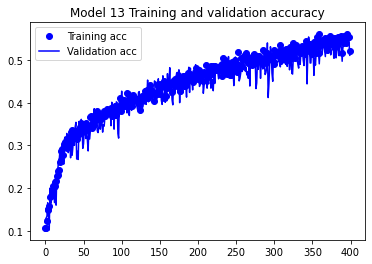

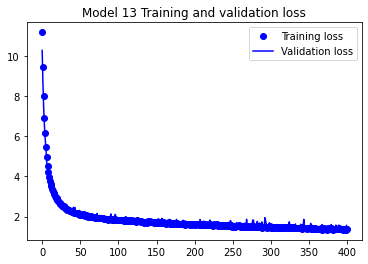

In [68]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 13 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 13 Training and validation loss')
plt.legend()

plt.show()

In [69]:
# Save the Model
model.save('food_model_13.h5')

### Model #14

#### 400 epochs to 800 epochs

In [4]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Network
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 4th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 5th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

# Add Dropout
model.add(layers.Dropout(0.5))

# 1st Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# 2nd Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              # Add Learning Rate
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [7]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [9]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=800,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/800
100/100 [==============================] - 26s 265ms/step - loss: 11.1044 - acc: 0.1045 - val_loss: 10.1441 - val_acc: 0.1070
Epoch 2/800
100/100 [==============================] - 25s 248ms/step - loss: 9.3110 - acc: 0.1215 - val_loss: 8.5133 - val_acc: 0.1370
Epoch 3/800
100/100 [==============================] - 25s 252ms/step - loss: 7.8806 - acc: 0.1475 - val_loss: 7.2787 - val_acc: 0.1690
Epoch 4/800
100/100 [==============================] - 24s 241ms/step - loss: 6.8019 - acc: 0.1665 - val_loss: 6.4354 - val_acc: 0.1600
Epoch 5/800
100/100 [==============================] - 24s 245ms/step - loss: 6.0066 - acc: 0.1765 - val_loss: 5.6768 - val_acc: 0.1870
Epoch 6/800
100/100 [==============================] - 24s 243ms/step - loss: 5.3514 - acc: 0.1905 - val_loss: 5.2317 - val_acc: 0.1860
Epoch 7/800
1

Epoch 117/800
100/100 [==============================] - 25s 245ms/step - loss: 1.7181 - acc: 0.4270 - val_loss: 1.9888 - val_acc: 0.3570
Epoch 118/800
100/100 [==============================] - 24s 242ms/step - loss: 1.7543 - acc: 0.4190 - val_loss: 1.6833 - val_acc: 0.4540
Epoch 119/800
100/100 [==============================] - 25s 247ms/step - loss: 1.7262 - acc: 0.4340 - val_loss: 1.9047 - val_acc: 0.3840
Epoch 120/800
100/100 [==============================] - 24s 242ms/step - loss: 1.7355 - acc: 0.4225 - val_loss: 1.8610 - val_acc: 0.4010
Epoch 121/800
100/100 [==============================] - 24s 244ms/step - loss: 1.7393 - acc: 0.4310 - val_loss: 1.6844 - val_acc: 0.4720
Epoch 122/800
100/100 [==============================] - 24s 238ms/step - loss: 1.7234 - acc: 0.4435 - val_loss: 1.8995 - val_acc: 0.3960
Epoch 123/800
100/100 [==============================] - 25s 245ms/step - loss: 1.7793 - acc: 0.4150 - val_loss: 1.7582 - val_acc: 0.4360
Epoch 124/800
100/100 [===========

100/100 [==============================] - 24s 238ms/step - loss: 1.5524 - acc: 0.4810 - val_loss: 1.6713 - val_acc: 0.4590
Epoch 236/800
100/100 [==============================] - 25s 245ms/step - loss: 1.4958 - acc: 0.4980 - val_loss: 1.6146 - val_acc: 0.4800
Epoch 237/800
100/100 [==============================] - 24s 238ms/step - loss: 1.5028 - acc: 0.5025 - val_loss: 1.5125 - val_acc: 0.5010
Epoch 238/800
100/100 [==============================] - 24s 243ms/step - loss: 1.4945 - acc: 0.4940 - val_loss: 1.6234 - val_acc: 0.4800
Epoch 239/800
100/100 [==============================] - 24s 239ms/step - loss: 1.5369 - acc: 0.4935 - val_loss: 1.5943 - val_acc: 0.4770
Epoch 240/800
100/100 [==============================] - 24s 239ms/step - loss: 1.5101 - acc: 0.5020 - val_loss: 1.5887 - val_acc: 0.4920
Epoch 241/800
100/100 [==============================] - 24s 240ms/step - loss: 1.5041 - acc: 0.4985 - val_loss: 1.6934 - val_acc: 0.4630
Epoch 242/800
100/100 [=========================

100/100 [==============================] - 24s 242ms/step - loss: 1.3829 - acc: 0.5565 - val_loss: 1.3390 - val_acc: 0.5720
Epoch 354/800
100/100 [==============================] - 25s 247ms/step - loss: 1.3692 - acc: 0.5515 - val_loss: 1.4233 - val_acc: 0.5350
Epoch 355/800
100/100 [==============================] - 24s 242ms/step - loss: 1.3748 - acc: 0.5370 - val_loss: 1.5854 - val_acc: 0.4710
Epoch 356/800
100/100 [==============================] - 24s 244ms/step - loss: 1.3431 - acc: 0.5635 - val_loss: 1.4246 - val_acc: 0.5480
Epoch 357/800
100/100 [==============================] - 24s 244ms/step - loss: 1.3782 - acc: 0.5385 - val_loss: 1.9714 - val_acc: 0.4130
Epoch 358/800
100/100 [==============================] - 25s 246ms/step - loss: 1.4033 - acc: 0.5480 - val_loss: 1.5137 - val_acc: 0.5210
Epoch 359/800
100/100 [==============================] - 24s 241ms/step - loss: 1.3841 - acc: 0.5585 - val_loss: 1.4251 - val_acc: 0.5340
Epoch 360/800
100/100 [=========================

100/100 [==============================] - 25s 247ms/step - loss: 1.2723 - acc: 0.5890 - val_loss: 1.3877 - val_acc: 0.5810
Epoch 472/800
100/100 [==============================] - 24s 244ms/step - loss: 1.2695 - acc: 0.5755 - val_loss: 1.3999 - val_acc: 0.5750
Epoch 473/800
100/100 [==============================] - 25s 247ms/step - loss: 1.2339 - acc: 0.6105 - val_loss: 1.3874 - val_acc: 0.5660
Epoch 474/800
100/100 [==============================] - 25s 248ms/step - loss: 1.2471 - acc: 0.6055 - val_loss: 1.3264 - val_acc: 0.5830
Epoch 475/800
100/100 [==============================] - 25s 248ms/step - loss: 1.2551 - acc: 0.5900 - val_loss: 1.2771 - val_acc: 0.6130
Epoch 476/800
100/100 [==============================] - 24s 245ms/step - loss: 1.2215 - acc: 0.6035 - val_loss: 1.2669 - val_acc: 0.6070
Epoch 477/800
100/100 [==============================] - 25s 247ms/step - loss: 1.2721 - acc: 0.5950 - val_loss: 1.2958 - val_acc: 0.6070
Epoch 478/800
100/100 [=========================

100/100 [==============================] - 24s 240ms/step - loss: 1.1209 - acc: 0.6445 - val_loss: 1.2099 - val_acc: 0.6130
Epoch 590/800
100/100 [==============================] - 24s 239ms/step - loss: 1.1736 - acc: 0.6370 - val_loss: 1.2698 - val_acc: 0.6000
Epoch 591/800
100/100 [==============================] - 24s 245ms/step - loss: 1.1773 - acc: 0.6265 - val_loss: 1.2732 - val_acc: 0.5930
Epoch 592/800
100/100 [==============================] - 24s 240ms/step - loss: 1.1346 - acc: 0.6320 - val_loss: 1.3657 - val_acc: 0.6020
Epoch 593/800
100/100 [==============================] - 24s 237ms/step - loss: 1.1524 - acc: 0.6455 - val_loss: 1.2038 - val_acc: 0.6230
Epoch 594/800
100/100 [==============================] - 24s 244ms/step - loss: 1.1304 - acc: 0.6435 - val_loss: 1.1499 - val_acc: 0.6540
Epoch 595/800
100/100 [==============================] - 24s 239ms/step - loss: 1.1612 - acc: 0.6445 - val_loss: 1.1268 - val_acc: 0.6580
Epoch 596/800
100/100 [=========================

100/100 [==============================] - 24s 241ms/step - loss: 1.0874 - acc: 0.6635 - val_loss: 1.3075 - val_acc: 0.5900
Epoch 708/800
100/100 [==============================] - 24s 244ms/step - loss: 1.0560 - acc: 0.6715 - val_loss: 1.1780 - val_acc: 0.6480
Epoch 709/800
100/100 [==============================] - 24s 239ms/step - loss: 1.0802 - acc: 0.6680 - val_loss: 1.1324 - val_acc: 0.6650
Epoch 710/800
100/100 [==============================] - 24s 240ms/step - loss: 1.0866 - acc: 0.6775 - val_loss: 1.2256 - val_acc: 0.6510
Epoch 711/800
100/100 [==============================] - 24s 238ms/step - loss: 1.0476 - acc: 0.6835 - val_loss: 1.1901 - val_acc: 0.6270
Epoch 712/800
100/100 [==============================] - 25s 249ms/step - loss: 1.0690 - acc: 0.6780 - val_loss: 1.2142 - val_acc: 0.6380
Epoch 713/800
100/100 [==============================] - 24s 242ms/step - loss: 1.0456 - acc: 0.6885 - val_loss: 1.1235 - val_acc: 0.6670
Epoch 714/800
100/100 [=========================

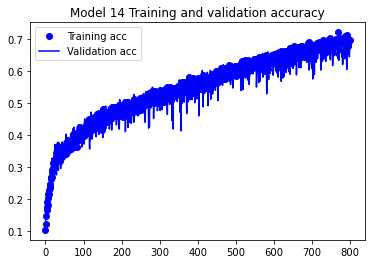

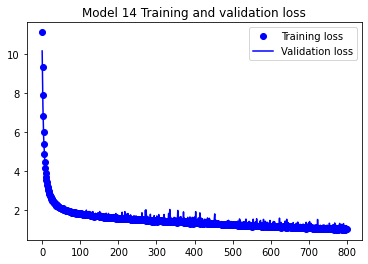

In [10]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 14 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 14 Training and validation loss')
plt.legend()

plt.show()

In [11]:
# Save the Model
model.save('food_model_14.h5')

### Model #15

#### decreased training batch size + increased step per epoch

In [24]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Network
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 4th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 5th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

# Add Dropout
model.add(layers.Dropout(0.5))

# 1st Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# 2nd Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 128)      

In [26]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              # Add Learning Rate
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [27]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        # reduce traning batch size from 20 to 10
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [28]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (10, 150, 150, 3)
labels batch shape: (10, 10)


In [29]:
# Train the Model
history = model.fit_generator(
      train_generator,
      # Increase step_per_epoch from 100 to 200
      steps_per_epoch=200,
      epochs=800,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 200 steps, validate for 50 steps
Epoch 1/800
200/200 [==============================] - 26s 129ms/step - loss: 10.4275 - acc: 0.0995 - val_loss: 8.8239 - val_acc: 0.1240
Epoch 2/800
200/200 [==============================] - 24s 122ms/step - loss: 7.5277 - acc: 0.1065 - val_loss: 6.3155 - val_acc: 0.1490
Epoch 3/800
200/200 [==============================] - 25s 123ms/step - loss: 5.4642 - acc: 0.1245 - val_loss: 4.7294 - val_acc: 0.1310
Epoch 4/800
200/200 [==============================] - 24s 121ms/step - loss: 4.2220 - acc: 0.1785 - val_loss: 3.8666 - val_acc: 0.1670
Epoch 5/800
200/200 [==============================] - 24s 122ms/step - loss: 3.6225 - acc: 0.1885 - val_loss: 3.3780 - val_acc: 0.2380
Epoch 6/800
200/200 [==============================] - 24s 122ms/step - loss: 3.3134 - acc: 0.1925 - val_loss: 3.2078 - val_acc: 0.2070
Epoch 7/800
200/200 [==============================] - 25s 123ms/step - loss: 3.1239 - acc

Epoch 119/800
200/200 [==============================] - 25s 123ms/step - loss: 1.6675 - acc: 0.4355 - val_loss: 2.0019 - val_acc: 0.4110
Epoch 120/800
200/200 [==============================] - 24s 120ms/step - loss: 1.6541 - acc: 0.4425 - val_loss: 1.6677 - val_acc: 0.4780
Epoch 121/800
200/200 [==============================] - 24s 121ms/step - loss: 1.6559 - acc: 0.4470 - val_loss: 1.5470 - val_acc: 0.5130
Epoch 122/800
200/200 [==============================] - 25s 123ms/step - loss: 1.6457 - acc: 0.4430 - val_loss: 1.8176 - val_acc: 0.4230
Epoch 123/800
200/200 [==============================] - 24s 120ms/step - loss: 1.6208 - acc: 0.4640 - val_loss: 1.7322 - val_acc: 0.4600
Epoch 124/800
200/200 [==============================] - 24s 121ms/step - loss: 1.6189 - acc: 0.4585 - val_loss: 1.6635 - val_acc: 0.4780
Epoch 125/800
200/200 [==============================] - 24s 120ms/step - loss: 1.6195 - acc: 0.4540 - val_loss: 1.5799 - val_acc: 0.4930
Epoch 126/800
200/200 [===========

200/200 [==============================] - 24s 122ms/step - loss: 1.3965 - acc: 0.5365 - val_loss: 1.8185 - val_acc: 0.4840
Epoch 238/800
200/200 [==============================] - 24s 120ms/step - loss: 1.4642 - acc: 0.5095 - val_loss: 1.4024 - val_acc: 0.5600
Epoch 239/800
200/200 [==============================] - 24s 120ms/step - loss: 1.4050 - acc: 0.5335 - val_loss: 1.4039 - val_acc: 0.5600
Epoch 240/800
200/200 [==============================] - 24s 120ms/step - loss: 1.3897 - acc: 0.5410 - val_loss: 1.4376 - val_acc: 0.5430
Epoch 241/800
200/200 [==============================] - 24s 122ms/step - loss: 1.4314 - acc: 0.5435 - val_loss: 1.3431 - val_acc: 0.5660
Epoch 242/800
200/200 [==============================] - 24s 120ms/step - loss: 1.4328 - acc: 0.5375 - val_loss: 1.3744 - val_acc: 0.5660
Epoch 243/800
200/200 [==============================] - 24s 120ms/step - loss: 1.4307 - acc: 0.5300 - val_loss: 1.3703 - val_acc: 0.5550
Epoch 244/800
200/200 [=========================

200/200 [==============================] - 24s 122ms/step - loss: 1.2971 - acc: 0.5915 - val_loss: 1.3404 - val_acc: 0.5810
Epoch 356/800
200/200 [==============================] - 24s 121ms/step - loss: 1.2452 - acc: 0.6085 - val_loss: 1.2396 - val_acc: 0.6100
Epoch 357/800
200/200 [==============================] - 24s 120ms/step - loss: 1.2538 - acc: 0.6040 - val_loss: 1.2991 - val_acc: 0.5840
Epoch 358/800
200/200 [==============================] - 24s 120ms/step - loss: 1.2724 - acc: 0.5980 - val_loss: 1.2556 - val_acc: 0.6040
Epoch 359/800
200/200 [==============================] - 24s 122ms/step - loss: 1.3000 - acc: 0.5770 - val_loss: 1.4836 - val_acc: 0.5490
Epoch 360/800
200/200 [==============================] - 24s 120ms/step - loss: 1.3159 - acc: 0.5870 - val_loss: 1.3370 - val_acc: 0.6000
Epoch 361/800
200/200 [==============================] - 24s 121ms/step - loss: 1.2669 - acc: 0.5920 - val_loss: 1.4216 - val_acc: 0.5640
Epoch 362/800
200/200 [=========================

200/200 [==============================] - 25s 123ms/step - loss: 1.1363 - acc: 0.6530 - val_loss: 1.2900 - val_acc: 0.6210
Epoch 474/800
200/200 [==============================] - 24s 121ms/step - loss: 1.1410 - acc: 0.6475 - val_loss: 1.4007 - val_acc: 0.6010
Epoch 475/800
200/200 [==============================] - 24s 121ms/step - loss: 1.1154 - acc: 0.6565 - val_loss: 1.2358 - val_acc: 0.6240
Epoch 476/800
200/200 [==============================] - 24s 121ms/step - loss: 1.1271 - acc: 0.6460 - val_loss: 1.2861 - val_acc: 0.6200
Epoch 477/800
200/200 [==============================] - 25s 123ms/step - loss: 1.2060 - acc: 0.6275 - val_loss: 1.1970 - val_acc: 0.6470
Epoch 478/800
200/200 [==============================] - 24s 120ms/step - loss: 1.1455 - acc: 0.6470 - val_loss: 1.5053 - val_acc: 0.5640
Epoch 479/800
200/200 [==============================] - 24s 121ms/step - loss: 1.1364 - acc: 0.6605 - val_loss: 1.1070 - val_acc: 0.6630
Epoch 480/800
200/200 [=========================

200/200 [==============================] - 24s 122ms/step - loss: 1.0808 - acc: 0.6715 - val_loss: 1.3988 - val_acc: 0.6020
Epoch 592/800
200/200 [==============================] - 24s 120ms/step - loss: 1.0537 - acc: 0.6860 - val_loss: 1.1830 - val_acc: 0.6840
Epoch 593/800
200/200 [==============================] - 24s 121ms/step - loss: 1.0850 - acc: 0.6725 - val_loss: 1.1759 - val_acc: 0.6780
Epoch 594/800
200/200 [==============================] - 24s 120ms/step - loss: 1.0922 - acc: 0.6715 - val_loss: 1.0871 - val_acc: 0.6720
Epoch 595/800
200/200 [==============================] - 24s 122ms/step - loss: 1.0518 - acc: 0.6920 - val_loss: 1.0484 - val_acc: 0.7020
Epoch 596/800
200/200 [==============================] - 24s 120ms/step - loss: 1.0542 - acc: 0.6865 - val_loss: 1.0233 - val_acc: 0.7150
Epoch 597/800
200/200 [==============================] - 24s 121ms/step - loss: 1.0490 - acc: 0.6805 - val_loss: 1.1594 - val_acc: 0.6750
Epoch 598/800
200/200 [=========================

200/200 [==============================] - 25s 123ms/step - loss: 1.0204 - acc: 0.6990 - val_loss: 1.0434 - val_acc: 0.7070
Epoch 710/800
200/200 [==============================] - 24s 121ms/step - loss: 1.0344 - acc: 0.6940 - val_loss: 1.0572 - val_acc: 0.6950
Epoch 711/800
200/200 [==============================] - 24s 120ms/step - loss: 0.9770 - acc: 0.7175 - val_loss: 1.1722 - val_acc: 0.6730
Epoch 712/800
200/200 [==============================] - 24s 121ms/step - loss: 0.9812 - acc: 0.7140 - val_loss: 1.3256 - val_acc: 0.6530
Epoch 713/800
200/200 [==============================] - 25s 123ms/step - loss: 1.0366 - acc: 0.6900 - val_loss: 0.9867 - val_acc: 0.7150
Epoch 714/800
200/200 [==============================] - 24s 120ms/step - loss: 0.9720 - acc: 0.7215 - val_loss: 1.2666 - val_acc: 0.6730
Epoch 715/800
200/200 [==============================] - 24s 120ms/step - loss: 0.9807 - acc: 0.7085 - val_loss: 1.0721 - val_acc: 0.6960
Epoch 716/800
200/200 [=========================

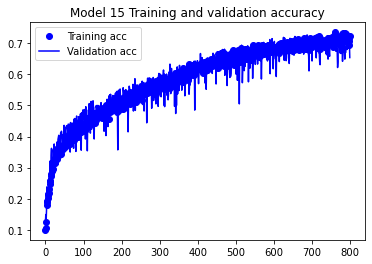

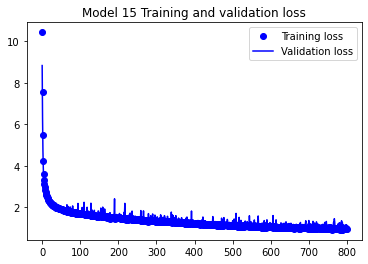

In [30]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 15 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 15 Training and validation loss')
plt.legend()

plt.show()

In [31]:
# Save the Model
model.save('food_model_15.h5')

### Model #16

#### epoch 800 to 1200

In [32]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Network
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 4th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 5th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten
model.add(layers.Flatten())

# Add Dropout
model.add(layers.Dropout(0.5))

# 1st Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# 2nd Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)      

In [34]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              # Add Learning Rate
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [35]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [36]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [37]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=1200,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/1200
100/100 [==============================] - 26s 257ms/step - loss: 11.1711 - acc: 0.1035 - val_loss: 10.2512 - val_acc: 0.1070
Epoch 2/1200
100/100 [==============================] - 24s 240ms/step - loss: 9.4220 - acc: 0.1010 - val_loss: 8.5917 - val_acc: 0.1070
Epoch 3/1200
100/100 [==============================] - 24s 241ms/step - loss: 7.8795 - acc: 0.1025 - val_loss: 7.1773 - val_acc: 0.1150
Epoch 4/1200
100/100 [==============================] - 24s 244ms/step - loss: 6.6123 - acc: 0.1420 - val_loss: 6.1233 - val_acc: 0.1200
Epoch 5/1200
100/100 [==============================] - 24s 241ms/step - loss: 5.6293 - acc: 0.1535 - val_loss: 5.2078 - val_acc: 0.1600
Epoch 6/1200
100/100 [==============================] - 24s 240ms/step - loss: 4.8710 - acc: 0.1745 - val_loss: 4.7076 - val_acc: 0.1610
Epoch 7/1200
100/100 [==============================] - 24s 239ms/step - loss: 4.36

Epoch 59/1200
100/100 [==============================] - 24s 241ms/step - loss: 1.9966 - acc: 0.3570 - val_loss: 2.0853 - val_acc: 0.3420
Epoch 60/1200
100/100 [==============================] - 25s 247ms/step - loss: 2.0084 - acc: 0.3495 - val_loss: 1.9613 - val_acc: 0.3620
Epoch 61/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.9784 - acc: 0.3520 - val_loss: 2.0642 - val_acc: 0.3550
Epoch 62/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.9564 - acc: 0.3580 - val_loss: 2.0341 - val_acc: 0.3550
Epoch 63/1200
100/100 [==============================] - 24s 240ms/step - loss: 1.9675 - acc: 0.3510 - val_loss: 1.9162 - val_acc: 0.3840
Epoch 64/1200
100/100 [==============================] - 24s 243ms/step - loss: 1.9453 - acc: 0.3600 - val_loss: 1.8950 - val_acc: 0.3880
Epoch 65/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.9271 - acc: 0.3665 - val_loss: 1.9351 - val_acc: 0.3830
Epoch 66/1200
100/100 [===========

100/100 [==============================] - 24s 243ms/step - loss: 1.6700 - acc: 0.4520 - val_loss: 1.6240 - val_acc: 0.4800
Epoch 178/1200
100/100 [==============================] - 24s 240ms/step - loss: 1.6056 - acc: 0.4530 - val_loss: 1.6801 - val_acc: 0.4550
Epoch 179/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.6235 - acc: 0.4575 - val_loss: 1.6256 - val_acc: 0.4680
Epoch 180/1200
100/100 [==============================] - 24s 240ms/step - loss: 1.6297 - acc: 0.4525 - val_loss: 1.5611 - val_acc: 0.4890
Epoch 181/1200
100/100 [==============================] - 24s 245ms/step - loss: 1.6215 - acc: 0.4495 - val_loss: 1.6708 - val_acc: 0.4630
Epoch 182/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.6272 - acc: 0.4430 - val_loss: 1.6784 - val_acc: 0.4600
Epoch 183/1200
100/100 [==============================] - 24s 240ms/step - loss: 1.6382 - acc: 0.4485 - val_loss: 1.6151 - val_acc: 0.4960
Epoch 184/1200
100/100 [==================

100/100 [==============================] - 25s 245ms/step - loss: 1.5055 - acc: 0.5195 - val_loss: 1.4343 - val_acc: 0.5300
Epoch 237/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.5363 - acc: 0.4885 - val_loss: 1.4603 - val_acc: 0.5280
Epoch 238/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.5208 - acc: 0.4870 - val_loss: 1.5576 - val_acc: 0.4670
Epoch 239/1200
100/100 [==============================] - 24s 240ms/step - loss: 1.5100 - acc: 0.5035 - val_loss: 1.5665 - val_acc: 0.4840
Epoch 240/1200
100/100 [==============================] - 24s 243ms/step - loss: 1.5045 - acc: 0.5015 - val_loss: 1.5473 - val_acc: 0.4840
Epoch 241/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.5122 - acc: 0.5015 - val_loss: 1.5218 - val_acc: 0.4950
Epoch 242/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.5232 - acc: 0.4920 - val_loss: 1.4948 - val_acc: 0.5140
Epoch 243/1200
100/100 [==================

100/100 [==============================] - 24s 242ms/step - loss: 1.4605 - acc: 0.5115 - val_loss: 1.4933 - val_acc: 0.4950
Epoch 296/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.4847 - acc: 0.5120 - val_loss: 1.3877 - val_acc: 0.5460
Epoch 297/1200
100/100 [==============================] - 24s 240ms/step - loss: 1.4376 - acc: 0.5300 - val_loss: 1.4672 - val_acc: 0.5170
Epoch 298/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.4652 - acc: 0.5080 - val_loss: 1.4675 - val_acc: 0.5180
Epoch 299/1200
100/100 [==============================] - 24s 243ms/step - loss: 1.4155 - acc: 0.5280 - val_loss: 1.5387 - val_acc: 0.5020
Epoch 300/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.4533 - acc: 0.5160 - val_loss: 1.4077 - val_acc: 0.5450
Epoch 301/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.4618 - acc: 0.5195 - val_loss: 1.6284 - val_acc: 0.4960
Epoch 302/1200
100/100 [==================

100/100 [==============================] - 24s 238ms/step - loss: 1.3729 - acc: 0.5435 - val_loss: 1.7125 - val_acc: 0.5060
Epoch 355/1200
100/100 [==============================] - 24s 243ms/step - loss: 1.3802 - acc: 0.5450 - val_loss: 1.3632 - val_acc: 0.5710
Epoch 356/1200
100/100 [==============================] - 24s 236ms/step - loss: 1.3569 - acc: 0.5560 - val_loss: 1.5424 - val_acc: 0.5280
Epoch 357/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.3725 - acc: 0.5400 - val_loss: 1.4256 - val_acc: 0.5530
Epoch 358/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.3781 - acc: 0.5445 - val_loss: 1.3599 - val_acc: 0.5630
Epoch 359/1200
100/100 [==============================] - 24s 243ms/step - loss: 1.3821 - acc: 0.5385 - val_loss: 1.4867 - val_acc: 0.5300
Epoch 360/1200
100/100 [==============================] - 24s 240ms/step - loss: 1.3745 - acc: 0.5500 - val_loss: 1.3967 - val_acc: 0.5530
Epoch 361/1200
100/100 [==================

100/100 [==============================] - 24s 239ms/step - loss: 1.3337 - acc: 0.5570 - val_loss: 1.2725 - val_acc: 0.6020
Epoch 414/1200
100/100 [==============================] - 24s 243ms/step - loss: 1.3213 - acc: 0.5625 - val_loss: 1.2891 - val_acc: 0.6200
Epoch 415/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.3328 - acc: 0.5660 - val_loss: 1.2610 - val_acc: 0.6060
Epoch 416/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.2943 - acc: 0.5730 - val_loss: 1.7086 - val_acc: 0.5020
Epoch 417/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.3062 - acc: 0.5630 - val_loss: 1.2953 - val_acc: 0.6060
Epoch 418/1200
100/100 [==============================] - 25s 246ms/step - loss: 1.3482 - acc: 0.5650 - val_loss: 1.2153 - val_acc: 0.6190
Epoch 419/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.2815 - acc: 0.5860 - val_loss: 1.2539 - val_acc: 0.6060
Epoch 420/1200
100/100 [==================

100/100 [==============================] - 24s 239ms/step - loss: 1.2596 - acc: 0.5990 - val_loss: 1.4327 - val_acc: 0.5830
Epoch 473/1200
100/100 [==============================] - 24s 243ms/step - loss: 1.2477 - acc: 0.6045 - val_loss: 1.3198 - val_acc: 0.5730
Epoch 474/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.2809 - acc: 0.5850 - val_loss: 1.2940 - val_acc: 0.6020
Epoch 475/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.2489 - acc: 0.6025 - val_loss: 1.1418 - val_acc: 0.6490
Epoch 476/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.2529 - acc: 0.6015 - val_loss: 1.3656 - val_acc: 0.5830
Epoch 477/1200
100/100 [==============================] - 24s 243ms/step - loss: 1.2558 - acc: 0.6080 - val_loss: 1.2191 - val_acc: 0.6320
Epoch 478/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.2521 - acc: 0.6020 - val_loss: 1.1843 - val_acc: 0.6370
Epoch 479/1200
100/100 [==================

100/100 [==============================] - 24s 239ms/step - loss: 1.2152 - acc: 0.6195 - val_loss: 1.3019 - val_acc: 0.5890
Epoch 532/1200
100/100 [==============================] - 24s 243ms/step - loss: 1.2158 - acc: 0.6215 - val_loss: 1.2848 - val_acc: 0.6220
Epoch 533/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.1868 - acc: 0.6220 - val_loss: 1.3683 - val_acc: 0.5790
Epoch 534/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.1968 - acc: 0.6195 - val_loss: 1.2626 - val_acc: 0.6110
Epoch 535/1200
100/100 [==============================] - 24s 240ms/step - loss: 1.1854 - acc: 0.6275 - val_loss: 1.1340 - val_acc: 0.6470
Epoch 536/1200
100/100 [==============================] - 24s 242ms/step - loss: 1.2171 - acc: 0.6210 - val_loss: 1.3161 - val_acc: 0.5910
Epoch 537/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.1752 - acc: 0.6380 - val_loss: 1.1470 - val_acc: 0.6560
Epoch 538/1200
100/100 [==================

100/100 [==============================] - 24s 239ms/step - loss: 1.1475 - acc: 0.6465 - val_loss: 1.1741 - val_acc: 0.6200
Epoch 591/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.1300 - acc: 0.6425 - val_loss: 1.0775 - val_acc: 0.6720
Epoch 592/1200
100/100 [==============================] - 24s 243ms/step - loss: 1.1488 - acc: 0.6430 - val_loss: 1.2034 - val_acc: 0.6090
Epoch 593/1200
100/100 [==============================] - 24s 240ms/step - loss: 1.1500 - acc: 0.6510 - val_loss: 1.0808 - val_acc: 0.6710
Epoch 594/1200
100/100 [==============================] - 24s 240ms/step - loss: 1.1149 - acc: 0.6500 - val_loss: 1.1572 - val_acc: 0.6510
Epoch 595/1200
100/100 [==============================] - 24s 243ms/step - loss: 1.1789 - acc: 0.6330 - val_loss: 1.1780 - val_acc: 0.6350
Epoch 596/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.1570 - acc: 0.6525 - val_loss: 1.1105 - val_acc: 0.6480
Epoch 597/1200
100/100 [==================

100/100 [==============================] - 24s 238ms/step - loss: 1.1065 - acc: 0.6690 - val_loss: 1.0974 - val_acc: 0.6700
Epoch 650/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.0818 - acc: 0.6665 - val_loss: 1.0867 - val_acc: 0.6640
Epoch 651/1200
100/100 [==============================] - 24s 243ms/step - loss: 1.0981 - acc: 0.6640 - val_loss: 1.0938 - val_acc: 0.6730
Epoch 652/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.0812 - acc: 0.6735 - val_loss: 1.1816 - val_acc: 0.6630
Epoch 653/1200
100/100 [==============================] - 24s 239ms/step - loss: 1.1246 - acc: 0.6510 - val_loss: 1.2911 - val_acc: 0.6080
Epoch 654/1200
100/100 [==============================] - 24s 241ms/step - loss: 1.1065 - acc: 0.6485 - val_loss: 1.1292 - val_acc: 0.6600
Epoch 655/1200
100/100 [==============================] - 24s 244ms/step - loss: 1.0620 - acc: 0.6755 - val_loss: 1.0872 - val_acc: 0.6810
Epoch 656/1200
100/100 [==================

100/100 [==============================] - 24s 242ms/step - loss: 1.0851 - acc: 0.6665 - val_loss: 0.9864 - val_acc: 0.7060
Epoch 709/1200
100/100 [==============================] - 25s 253ms/step - loss: 1.0600 - acc: 0.6615 - val_loss: 1.1326 - val_acc: 0.6580
Epoch 710/1200
100/100 [==============================] - 24s 243ms/step - loss: 1.0551 - acc: 0.6805 - val_loss: 1.0457 - val_acc: 0.6780
Epoch 711/1200
100/100 [==============================] - 24s 242ms/step - loss: 1.0597 - acc: 0.6760 - val_loss: 1.0525 - val_acc: 0.6960
Epoch 712/1200
100/100 [==============================] - 24s 238ms/step - loss: 1.0492 - acc: 0.6830 - val_loss: 1.0107 - val_acc: 0.7010
Epoch 713/1200
100/100 [==============================] - 25s 250ms/step - loss: 1.0405 - acc: 0.6860 - val_loss: 1.0982 - val_acc: 0.6750
Epoch 714/1200
100/100 [==============================] - 24s 243ms/step - loss: 1.0095 - acc: 0.6865 - val_loss: 1.0468 - val_acc: 0.6950
Epoch 715/1200
100/100 [==================

100/100 [==============================] - 25s 245ms/step - loss: 0.9817 - acc: 0.7070 - val_loss: 1.0076 - val_acc: 0.7030
Epoch 768/1200
100/100 [==============================] - 24s 241ms/step - loss: 0.9685 - acc: 0.7065 - val_loss: 0.9899 - val_acc: 0.6940
Epoch 769/1200
100/100 [==============================] - 24s 239ms/step - loss: 0.9760 - acc: 0.7005 - val_loss: 1.0155 - val_acc: 0.7020
Epoch 770/1200
100/100 [==============================] - 24s 242ms/step - loss: 1.0272 - acc: 0.7020 - val_loss: 1.1255 - val_acc: 0.6630
Epoch 771/1200
100/100 [==============================] - 25s 246ms/step - loss: 0.9714 - acc: 0.7055 - val_loss: 1.1713 - val_acc: 0.6450
Epoch 772/1200
100/100 [==============================] - 24s 239ms/step - loss: 0.9528 - acc: 0.7165 - val_loss: 1.0298 - val_acc: 0.7010
Epoch 773/1200
100/100 [==============================] - 24s 241ms/step - loss: 1.0502 - acc: 0.6790 - val_loss: 1.0474 - val_acc: 0.6880
Epoch 774/1200
100/100 [==================

100/100 [==============================] - 25s 247ms/step - loss: 0.9435 - acc: 0.7125 - val_loss: 1.1178 - val_acc: 0.6890
Epoch 827/1200
100/100 [==============================] - 24s 241ms/step - loss: 1.0315 - acc: 0.6935 - val_loss: 0.9873 - val_acc: 0.7110
Epoch 828/1200
100/100 [==============================] - 24s 240ms/step - loss: 0.9397 - acc: 0.7185 - val_loss: 1.0495 - val_acc: 0.7000
Epoch 829/1200
100/100 [==============================] - 24s 241ms/step - loss: 0.9759 - acc: 0.6935 - val_loss: 1.1182 - val_acc: 0.6560
Epoch 830/1200
100/100 [==============================] - 24s 244ms/step - loss: 0.9927 - acc: 0.6930 - val_loss: 0.9445 - val_acc: 0.7270
Epoch 831/1200
100/100 [==============================] - 24s 239ms/step - loss: 0.9682 - acc: 0.7085 - val_loss: 0.9658 - val_acc: 0.7040
Epoch 832/1200
100/100 [==============================] - 24s 238ms/step - loss: 0.9441 - acc: 0.7035 - val_loss: 0.9647 - val_acc: 0.7140
Epoch 833/1200
100/100 [==================

100/100 [==============================] - 24s 240ms/step - loss: 0.9156 - acc: 0.7235 - val_loss: 1.0635 - val_acc: 0.6830
Epoch 886/1200
100/100 [==============================] - 25s 246ms/step - loss: 0.9207 - acc: 0.7200 - val_loss: 0.9839 - val_acc: 0.7180
Epoch 887/1200
100/100 [==============================] - 24s 244ms/step - loss: 0.9810 - acc: 0.7075 - val_loss: 1.2607 - val_acc: 0.6530
Epoch 888/1200
100/100 [==============================] - 25s 245ms/step - loss: 0.9403 - acc: 0.7140 - val_loss: 1.0038 - val_acc: 0.7100
Epoch 889/1200
100/100 [==============================] - 24s 241ms/step - loss: 0.8946 - acc: 0.7140 - val_loss: 1.0795 - val_acc: 0.6810
Epoch 890/1200
100/100 [==============================] - 24s 244ms/step - loss: 0.9287 - acc: 0.7250 - val_loss: 0.9795 - val_acc: 0.7190
Epoch 891/1200
100/100 [==============================] - 24s 240ms/step - loss: 0.9297 - acc: 0.7175 - val_loss: 0.9522 - val_acc: 0.7260
Epoch 892/1200
100/100 [==================

100/100 [==============================] - 24s 238ms/step - loss: 0.8977 - acc: 0.7275 - val_loss: 0.9665 - val_acc: 0.7050
Epoch 945/1200
100/100 [==============================] - 24s 243ms/step - loss: 0.8954 - acc: 0.7370 - val_loss: 0.9647 - val_acc: 0.7220
Epoch 946/1200
100/100 [==============================] - 24s 238ms/step - loss: 0.8868 - acc: 0.7445 - val_loss: 0.9472 - val_acc: 0.7240
Epoch 947/1200
100/100 [==============================] - 24s 240ms/step - loss: 0.9093 - acc: 0.7395 - val_loss: 0.9253 - val_acc: 0.7360
Epoch 948/1200
100/100 [==============================] - 24s 238ms/step - loss: 0.9303 - acc: 0.7235 - val_loss: 1.0488 - val_acc: 0.7020
Epoch 949/1200
100/100 [==============================] - 24s 244ms/step - loss: 0.8828 - acc: 0.7425 - val_loss: 1.0779 - val_acc: 0.7100
Epoch 950/1200
100/100 [==============================] - 24s 241ms/step - loss: 0.8816 - acc: 0.7320 - val_loss: 0.9571 - val_acc: 0.7140
Epoch 951/1200
100/100 [==================

100/100 [==============================] - 25s 246ms/step - loss: 0.8507 - acc: 0.7405 - val_loss: 1.0060 - val_acc: 0.7250
Epoch 1004/1200
100/100 [==============================] - 25s 251ms/step - loss: 0.8925 - acc: 0.7280 - val_loss: 0.9631 - val_acc: 0.7330
Epoch 1005/1200
100/100 [==============================] - 25s 246ms/step - loss: 0.8815 - acc: 0.7370 - val_loss: 0.9024 - val_acc: 0.7310
Epoch 1006/1200
100/100 [==============================] - 24s 243ms/step - loss: 0.8556 - acc: 0.7355 - val_loss: 1.1201 - val_acc: 0.6940
Epoch 1007/1200
100/100 [==============================] - 24s 240ms/step - loss: 0.9045 - acc: 0.7340 - val_loss: 0.9355 - val_acc: 0.7240
Epoch 1008/1200
100/100 [==============================] - 24s 243ms/step - loss: 0.8788 - acc: 0.7385 - val_loss: 0.9487 - val_acc: 0.7320
Epoch 1009/1200
100/100 [==============================] - 24s 240ms/step - loss: 0.8745 - acc: 0.7445 - val_loss: 1.2904 - val_acc: 0.6600
Epoch 1010/1200
100/100 [===========

100/100 [==============================] - 24s 244ms/step - loss: 0.8459 - acc: 0.7535 - val_loss: 0.9573 - val_acc: 0.7160
Epoch 1120/1200
100/100 [==============================] - 24s 240ms/step - loss: 0.8217 - acc: 0.7555 - val_loss: 1.1218 - val_acc: 0.6890
Epoch 1121/1200
100/100 [==============================] - 24s 239ms/step - loss: 0.8117 - acc: 0.7645 - val_loss: 0.8942 - val_acc: 0.7340
Epoch 1122/1200
100/100 [==============================] - 24s 241ms/step - loss: 0.8011 - acc: 0.7635 - val_loss: 0.9420 - val_acc: 0.7300
Epoch 1123/1200
100/100 [==============================] - 24s 241ms/step - loss: 0.8233 - acc: 0.7470 - val_loss: 0.9393 - val_acc: 0.7360
Epoch 1124/1200
100/100 [==============================] - 24s 237ms/step - loss: 0.8333 - acc: 0.7600 - val_loss: 0.9601 - val_acc: 0.7140
Epoch 1125/1200
100/100 [==============================] - 24s 238ms/step - loss: 0.8598 - acc: 0.7425 - val_loss: 0.9186 - val_acc: 0.7260
Epoch 1126/1200
100/100 [===========

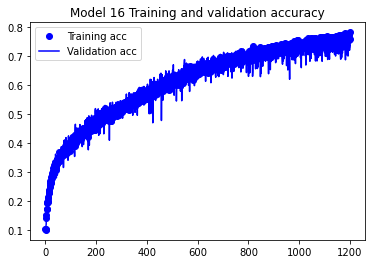

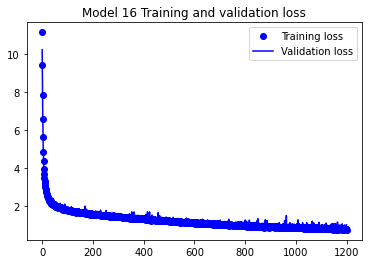

In [38]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 16 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 16 Training and validation loss')
plt.legend()

plt.show()

In [39]:
# Save the Model
model.save('food_model_16.h5')

In [42]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
  ...
    to  
  ['...']
test acc: 0.708


### Model #17

#### epoch 1200 to 2000

In [298]:
# Build the Model

# Set image size as 150*150
img_size = 150

# 1st Convolutional Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Network
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 4th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 5th Convolutional Network
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

# Add Dropout
model.add(layers.Dropout(0.5))

# 1st Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# 2nd Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [299]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_974 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_975 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_976 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_977 (Conv2D)          (None, 15, 15, 128)     

In [300]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              # Add Learning Rate
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [301]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
# 20 pictures, each pic is 150 by 150, 3 colors therefore 3 layers

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [302]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=2000,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/2000
100/100 [==============================] - 27s 275ms/step - loss: 11.1993 - acc: 0.1140 - val_loss: 10.3101 - val_acc: 0.1060
Epoch 2/2000
100/100 [==============================] - 26s 260ms/step - loss: 9.4958 - acc: 0.1115 - val_loss: 8.6931 - val_acc: 0.1670
Epoch 3/2000
100/100 [==============================] - 26s 262ms/step - loss: 8.0007 - acc: 0.1225 - val_loss: 7.3265 - val_acc: 0.1820
Epoch 4/2000
100/100 [==============================] - 26s 263ms/step - loss: 6.8366 - acc: 0.1570 - val_loss: 6.3613 - val_acc: 0.1710
Epoch 5/2000
100/100 [==============================] - 27s 268ms/step - loss: 6.0031 - acc: 0.1620 - val_loss: 5.6951 - val_acc: 0.1660
Epoch 6/2000
100/100 [==============================] - 26s 260ms/step - loss: 5.3627 - acc: 0.1795 - val_loss: 5.0777 - val_acc: 0.1650
Epoch 7/2000
100/100 [==============================] - 26s 260ms/step - loss: 4.84

Epoch 59/2000
100/100 [==============================] - 26s 259ms/step - loss: 2.0555 - acc: 0.3385 - val_loss: 2.2071 - val_acc: 0.3180
Epoch 60/2000
100/100 [==============================] - 26s 260ms/step - loss: 2.0571 - acc: 0.3295 - val_loss: 1.9789 - val_acc: 0.3720
Epoch 61/2000
100/100 [==============================] - 26s 261ms/step - loss: 2.0239 - acc: 0.3470 - val_loss: 1.9851 - val_acc: 0.3840
Epoch 62/2000
100/100 [==============================] - 26s 259ms/step - loss: 1.9953 - acc: 0.3620 - val_loss: 1.9822 - val_acc: 0.3850
Epoch 63/2000
100/100 [==============================] - 26s 258ms/step - loss: 2.0052 - acc: 0.3665 - val_loss: 2.0161 - val_acc: 0.3660
Epoch 64/2000
100/100 [==============================] - 26s 263ms/step - loss: 1.9769 - acc: 0.3660 - val_loss: 2.0093 - val_acc: 0.3550
Epoch 65/2000
100/100 [==============================] - 26s 259ms/step - loss: 1.9815 - acc: 0.3685 - val_loss: 2.0183 - val_acc: 0.3450
Epoch 66/2000
100/100 [===========

100/100 [==============================] - 26s 260ms/step - loss: 1.6958 - acc: 0.4365 - val_loss: 1.5328 - val_acc: 0.4930
Epoch 178/2000
100/100 [==============================] - 26s 260ms/step - loss: 1.6267 - acc: 0.4610 - val_loss: 1.6659 - val_acc: 0.4730
Epoch 179/2000
100/100 [==============================] - 26s 262ms/step - loss: 1.6358 - acc: 0.4510 - val_loss: 1.5064 - val_acc: 0.5010
Epoch 180/2000
100/100 [==============================] - 26s 259ms/step - loss: 1.6433 - acc: 0.4465 - val_loss: 1.5997 - val_acc: 0.4880
Epoch 181/2000
100/100 [==============================] - 26s 257ms/step - loss: 1.6852 - acc: 0.4380 - val_loss: 1.6713 - val_acc: 0.4610
Epoch 182/2000
100/100 [==============================] - 26s 260ms/step - loss: 1.6401 - acc: 0.4650 - val_loss: 1.6057 - val_acc: 0.4760
Epoch 183/2000
100/100 [==============================] - 26s 264ms/step - loss: 1.6979 - acc: 0.4350 - val_loss: 1.5726 - val_acc: 0.4860
Epoch 184/2000
100/100 [==================

100/100 [==============================] - 26s 258ms/step - loss: 1.5552 - acc: 0.4890 - val_loss: 1.6530 - val_acc: 0.4760
Epoch 237/2000
100/100 [==============================] - 26s 257ms/step - loss: 1.5755 - acc: 0.4815 - val_loss: 1.5286 - val_acc: 0.4940
Epoch 238/2000
100/100 [==============================] - 26s 264ms/step - loss: 1.5598 - acc: 0.4855 - val_loss: 1.5356 - val_acc: 0.5070
Epoch 239/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.6193 - acc: 0.4670 - val_loss: 1.4919 - val_acc: 0.5140
Epoch 240/2000
100/100 [==============================] - 26s 259ms/step - loss: 1.5750 - acc: 0.4735 - val_loss: 1.5361 - val_acc: 0.4740
Epoch 241/2000
100/100 [==============================] - 26s 259ms/step - loss: 1.5810 - acc: 0.4735 - val_loss: 1.5944 - val_acc: 0.4780
Epoch 242/2000
100/100 [==============================] - 26s 262ms/step - loss: 1.5626 - acc: 0.4880 - val_loss: 1.5374 - val_acc: 0.4910
Epoch 243/2000
100/100 [==================

100/100 [==============================] - 26s 257ms/step - loss: 1.4843 - acc: 0.5215 - val_loss: 1.4958 - val_acc: 0.5190
Epoch 296/2000
100/100 [==============================] - 26s 259ms/step - loss: 1.5244 - acc: 0.5060 - val_loss: 1.4588 - val_acc: 0.5240
Epoch 297/2000
100/100 [==============================] - 26s 257ms/step - loss: 1.5033 - acc: 0.5125 - val_loss: 1.6490 - val_acc: 0.4680
Epoch 298/2000
100/100 [==============================] - 26s 261ms/step - loss: 1.4779 - acc: 0.5065 - val_loss: 1.5752 - val_acc: 0.4910
Epoch 299/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.5452 - acc: 0.4910 - val_loss: 1.4125 - val_acc: 0.5280
Epoch 300/2000
100/100 [==============================] - 26s 259ms/step - loss: 1.4987 - acc: 0.5130 - val_loss: 1.4597 - val_acc: 0.5230
Epoch 301/2000
100/100 [==============================] - 26s 261ms/step - loss: 1.4986 - acc: 0.5180 - val_loss: 1.9447 - val_acc: 0.4180
Epoch 302/2000
100/100 [==================

100/100 [==============================] - 26s 260ms/step - loss: 1.4547 - acc: 0.5325 - val_loss: 1.3392 - val_acc: 0.5580
Epoch 355/2000
100/100 [==============================] - 26s 256ms/step - loss: 1.4728 - acc: 0.5185 - val_loss: 1.3890 - val_acc: 0.5440
Epoch 356/2000
100/100 [==============================] - 26s 257ms/step - loss: 1.4181 - acc: 0.5370 - val_loss: 1.3688 - val_acc: 0.5510
Epoch 357/2000
100/100 [==============================] - 26s 263ms/step - loss: 1.4058 - acc: 0.5425 - val_loss: 1.4909 - val_acc: 0.5230
Epoch 358/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.4617 - acc: 0.5225 - val_loss: 1.3573 - val_acc: 0.5470
Epoch 359/2000
100/100 [==============================] - 26s 259ms/step - loss: 1.4430 - acc: 0.5325 - val_loss: 1.4295 - val_acc: 0.5400
Epoch 360/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.4569 - acc: 0.5170 - val_loss: 1.4449 - val_acc: 0.5360
Epoch 361/2000
100/100 [==================

100/100 [==============================] - 26s 261ms/step - loss: 1.3965 - acc: 0.5410 - val_loss: 1.3990 - val_acc: 0.5420
Epoch 414/2000
100/100 [==============================] - 26s 259ms/step - loss: 1.4201 - acc: 0.5370 - val_loss: 1.3990 - val_acc: 0.5530
Epoch 415/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.3988 - acc: 0.5465 - val_loss: 1.3497 - val_acc: 0.5610
Epoch 416/2000
100/100 [==============================] - 26s 262ms/step - loss: 1.3611 - acc: 0.5630 - val_loss: 1.4190 - val_acc: 0.5240
Epoch 417/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.3864 - acc: 0.5515 - val_loss: 1.4085 - val_acc: 0.5560
Epoch 418/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.3695 - acc: 0.5510 - val_loss: 1.3331 - val_acc: 0.5570
Epoch 419/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.3784 - acc: 0.5560 - val_loss: 1.4196 - val_acc: 0.5540
Epoch 420/2000
100/100 [==================

100/100 [==============================] - 26s 262ms/step - loss: 1.3327 - acc: 0.5690 - val_loss: 1.3429 - val_acc: 0.5850
Epoch 473/2000
100/100 [==============================] - 26s 256ms/step - loss: 1.3107 - acc: 0.5920 - val_loss: 1.2695 - val_acc: 0.5880
Epoch 474/2000
100/100 [==============================] - 26s 260ms/step - loss: 1.3357 - acc: 0.5795 - val_loss: 1.2866 - val_acc: 0.5850
Epoch 475/2000
100/100 [==============================] - 26s 262ms/step - loss: 1.3243 - acc: 0.5855 - val_loss: 1.4481 - val_acc: 0.5360
Epoch 476/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.3264 - acc: 0.5745 - val_loss: 1.3344 - val_acc: 0.5930
Epoch 477/2000
100/100 [==============================] - 26s 257ms/step - loss: 1.3129 - acc: 0.5670 - val_loss: 1.5783 - val_acc: 0.5200
Epoch 478/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.3804 - acc: 0.5640 - val_loss: 1.3493 - val_acc: 0.5840
Epoch 479/2000
100/100 [==================

100/100 [==============================] - 26s 261ms/step - loss: 1.2499 - acc: 0.6085 - val_loss: 1.3442 - val_acc: 0.5950
Epoch 532/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.2685 - acc: 0.5975 - val_loss: 1.2557 - val_acc: 0.6100
Epoch 533/2000
100/100 [==============================] - 26s 257ms/step - loss: 1.3320 - acc: 0.5785 - val_loss: 1.3325 - val_acc: 0.5970
Epoch 534/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.2543 - acc: 0.5935 - val_loss: 1.2652 - val_acc: 0.6180
Epoch 535/2000
100/100 [==============================] - 26s 262ms/step - loss: 1.2500 - acc: 0.5845 - val_loss: 1.1664 - val_acc: 0.6360
Epoch 536/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.2479 - acc: 0.5990 - val_loss: 1.2328 - val_acc: 0.6200
Epoch 537/2000
100/100 [==============================] - 26s 259ms/step - loss: 1.2412 - acc: 0.6070 - val_loss: 1.2419 - val_acc: 0.6270
Epoch 538/2000
100/100 [==================

100/100 [==============================] - 26s 263ms/step - loss: 1.2107 - acc: 0.6195 - val_loss: 1.4384 - val_acc: 0.5950
Epoch 591/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.1932 - acc: 0.6185 - val_loss: 1.1800 - val_acc: 0.6460
Epoch 592/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.1899 - acc: 0.6215 - val_loss: 1.1177 - val_acc: 0.6480
Epoch 593/2000
100/100 [==============================] - 26s 256ms/step - loss: 1.2104 - acc: 0.6125 - val_loss: 1.1254 - val_acc: 0.6600
Epoch 594/2000
100/100 [==============================] - 26s 263ms/step - loss: 1.1313 - acc: 0.6455 - val_loss: 1.2438 - val_acc: 0.6390
Epoch 595/2000
100/100 [==============================] - 26s 257ms/step - loss: 1.1843 - acc: 0.6430 - val_loss: 1.0980 - val_acc: 0.6500
Epoch 596/2000
100/100 [==============================] - 26s 259ms/step - loss: 1.2150 - acc: 0.6195 - val_loss: 1.1114 - val_acc: 0.6530
Epoch 597/2000
100/100 [==================

100/100 [==============================] - 26s 260ms/step - loss: 1.1529 - acc: 0.6530 - val_loss: 1.1597 - val_acc: 0.6380
Epoch 650/2000
100/100 [==============================] - 26s 259ms/step - loss: 1.1460 - acc: 0.6400 - val_loss: 1.0951 - val_acc: 0.6640
Epoch 651/2000
100/100 [==============================] - 26s 256ms/step - loss: 1.1453 - acc: 0.6530 - val_loss: 1.1196 - val_acc: 0.6490
Epoch 652/2000
100/100 [==============================] - 26s 257ms/step - loss: 1.1641 - acc: 0.6445 - val_loss: 1.0828 - val_acc: 0.6750
Epoch 653/2000
100/100 [==============================] - 26s 261ms/step - loss: 1.1503 - acc: 0.6460 - val_loss: 1.0719 - val_acc: 0.6810
Epoch 654/2000
100/100 [==============================] - 26s 256ms/step - loss: 1.0963 - acc: 0.6630 - val_loss: 1.0792 - val_acc: 0.6650
Epoch 655/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.1355 - acc: 0.6490 - val_loss: 1.1056 - val_acc: 0.6620
Epoch 656/2000
100/100 [==================

100/100 [==============================] - 26s 258ms/step - loss: 1.1221 - acc: 0.6445 - val_loss: 1.1228 - val_acc: 0.6720
Epoch 709/2000
100/100 [==============================] - 26s 262ms/step - loss: 1.0693 - acc: 0.6835 - val_loss: 0.9758 - val_acc: 0.6870
Epoch 710/2000
100/100 [==============================] - 26s 256ms/step - loss: 1.0619 - acc: 0.6740 - val_loss: 1.0668 - val_acc: 0.6630
Epoch 711/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.1013 - acc: 0.6690 - val_loss: 1.0440 - val_acc: 0.6830
Epoch 712/2000
100/100 [==============================] - 26s 257ms/step - loss: 1.0626 - acc: 0.6770 - val_loss: 1.0880 - val_acc: 0.6850
Epoch 713/2000
100/100 [==============================] - 26s 261ms/step - loss: 1.0475 - acc: 0.6850 - val_loss: 1.0771 - val_acc: 0.6650
Epoch 714/2000
100/100 [==============================] - 26s 257ms/step - loss: 1.0842 - acc: 0.6695 - val_loss: 1.1873 - val_acc: 0.6590
Epoch 715/2000
100/100 [==================

100/100 [==============================] - 26s 260ms/step - loss: 1.0737 - acc: 0.6760 - val_loss: 1.1451 - val_acc: 0.6610
Epoch 768/2000
100/100 [==============================] - 26s 262ms/step - loss: 1.0089 - acc: 0.6925 - val_loss: 1.0813 - val_acc: 0.6700
Epoch 769/2000
100/100 [==============================] - 26s 259ms/step - loss: 1.0711 - acc: 0.6895 - val_loss: 1.1036 - val_acc: 0.6820
Epoch 770/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.0571 - acc: 0.6860 - val_loss: 1.0213 - val_acc: 0.6960
Epoch 771/2000
100/100 [==============================] - 26s 260ms/step - loss: 1.0512 - acc: 0.6875 - val_loss: 1.3457 - val_acc: 0.6270
Epoch 772/2000
100/100 [==============================] - 26s 262ms/step - loss: 1.0529 - acc: 0.6730 - val_loss: 1.0701 - val_acc: 0.6760
Epoch 773/2000
100/100 [==============================] - 26s 256ms/step - loss: 1.0204 - acc: 0.6855 - val_loss: 1.1703 - val_acc: 0.6350
Epoch 774/2000
100/100 [==================

100/100 [==============================] - 26s 259ms/step - loss: 1.0255 - acc: 0.6900 - val_loss: 1.1430 - val_acc: 0.6550
Epoch 827/2000
100/100 [==============================] - 26s 262ms/step - loss: 1.0572 - acc: 0.6835 - val_loss: 1.0232 - val_acc: 0.6930
Epoch 828/2000
100/100 [==============================] - 26s 258ms/step - loss: 1.0019 - acc: 0.7000 - val_loss: 1.0145 - val_acc: 0.6950
Epoch 829/2000
100/100 [==============================] - 26s 257ms/step - loss: 1.0057 - acc: 0.7000 - val_loss: 1.1280 - val_acc: 0.6780
Epoch 830/2000
100/100 [==============================] - 26s 259ms/step - loss: 0.9921 - acc: 0.6940 - val_loss: 0.9530 - val_acc: 0.7110
Epoch 831/2000
100/100 [==============================] - 26s 263ms/step - loss: 1.0136 - acc: 0.7065 - val_loss: 0.9809 - val_acc: 0.7020
Epoch 832/2000
100/100 [==============================] - 26s 260ms/step - loss: 0.9870 - acc: 0.6965 - val_loss: 1.0748 - val_acc: 0.6870
Epoch 833/2000
100/100 [==================

100/100 [==============================] - 26s 258ms/step - loss: 0.9598 - acc: 0.7050 - val_loss: 1.1079 - val_acc: 0.6830
Epoch 886/2000
100/100 [==============================] - 26s 259ms/step - loss: 0.9849 - acc: 0.7050 - val_loss: 1.2910 - val_acc: 0.6350
Epoch 887/2000
100/100 [==============================] - 26s 261ms/step - loss: 0.9921 - acc: 0.7000 - val_loss: 1.0634 - val_acc: 0.6850
Epoch 888/2000
100/100 [==============================] - 26s 259ms/step - loss: 1.0012 - acc: 0.7010 - val_loss: 1.0641 - val_acc: 0.6730
Epoch 889/2000
100/100 [==============================] - 26s 258ms/step - loss: 0.9383 - acc: 0.7150 - val_loss: 1.0513 - val_acc: 0.6950
Epoch 890/2000
100/100 [==============================] - 26s 261ms/step - loss: 0.9343 - acc: 0.7280 - val_loss: 1.0756 - val_acc: 0.6720
Epoch 891/2000
100/100 [==============================] - 26s 258ms/step - loss: 0.9129 - acc: 0.7295 - val_loss: 0.9237 - val_acc: 0.7200
Epoch 892/2000
100/100 [==================

100/100 [==============================] - 26s 257ms/step - loss: 0.9192 - acc: 0.7245 - val_loss: 0.9971 - val_acc: 0.7060
Epoch 945/2000
100/100 [==============================] - 26s 260ms/step - loss: 0.9208 - acc: 0.7255 - val_loss: 0.9326 - val_acc: 0.7270
Epoch 946/2000
100/100 [==============================] - 26s 262ms/step - loss: 0.9314 - acc: 0.7275 - val_loss: 0.9664 - val_acc: 0.7070
Epoch 947/2000
100/100 [==============================] - 26s 257ms/step - loss: 0.9195 - acc: 0.7195 - val_loss: 1.0351 - val_acc: 0.6890
Epoch 948/2000
100/100 [==============================] - 26s 257ms/step - loss: 0.9469 - acc: 0.7155 - val_loss: 0.8892 - val_acc: 0.7420
Epoch 949/2000
100/100 [==============================] - 26s 259ms/step - loss: 0.9263 - acc: 0.7275 - val_loss: 1.0126 - val_acc: 0.6980
Epoch 950/2000
100/100 [==============================] - 26s 262ms/step - loss: 0.9133 - acc: 0.7300 - val_loss: 1.2070 - val_acc: 0.6510
Epoch 951/2000
100/100 [==================

100/100 [==============================] - 26s 265ms/step - loss: 0.9394 - acc: 0.7345 - val_loss: 0.9494 - val_acc: 0.7300
Epoch 1004/2000
100/100 [==============================] - 27s 269ms/step - loss: 0.9078 - acc: 0.7385 - val_loss: 1.0218 - val_acc: 0.7000
Epoch 1005/2000
100/100 [==============================] - 26s 262ms/step - loss: 0.9176 - acc: 0.7265 - val_loss: 0.9521 - val_acc: 0.7100
Epoch 1006/2000
100/100 [==============================] - 26s 265ms/step - loss: 0.9130 - acc: 0.7260 - val_loss: 1.0397 - val_acc: 0.6950
Epoch 1007/2000
100/100 [==============================] - 27s 265ms/step - loss: 0.9076 - acc: 0.7290 - val_loss: 0.9534 - val_acc: 0.7220
Epoch 1008/2000
100/100 [==============================] - 27s 267ms/step - loss: 0.8887 - acc: 0.7295 - val_loss: 0.9123 - val_acc: 0.7280
Epoch 1009/2000
100/100 [==============================] - 26s 263ms/step - loss: 0.9549 - acc: 0.7155 - val_loss: 1.1552 - val_acc: 0.6660
Epoch 1010/2000
100/100 [===========

100/100 [==============================] - 26s 260ms/step - loss: 0.8534 - acc: 0.7430 - val_loss: 0.9515 - val_acc: 0.7270
Epoch 1120/2000
100/100 [==============================] - 26s 264ms/step - loss: 0.8717 - acc: 0.7470 - val_loss: 0.9399 - val_acc: 0.7300
Epoch 1121/2000
100/100 [==============================] - 26s 265ms/step - loss: 0.8779 - acc: 0.7470 - val_loss: 0.9198 - val_acc: 0.7210
Epoch 1122/2000
100/100 [==============================] - 27s 268ms/step - loss: 0.7933 - acc: 0.7705 - val_loss: 0.9629 - val_acc: 0.7130
Epoch 1123/2000
100/100 [==============================] - 27s 266ms/step - loss: 0.8195 - acc: 0.7675 - val_loss: 1.1070 - val_acc: 0.6750
Epoch 1124/2000
100/100 [==============================] - 26s 261ms/step - loss: 0.8538 - acc: 0.7445 - val_loss: 0.9936 - val_acc: 0.7080
Epoch 1125/2000
100/100 [==============================] - 27s 269ms/step - loss: 0.8186 - acc: 0.7620 - val_loss: 1.0196 - val_acc: 0.7090
Epoch 1126/2000
100/100 [===========

100/100 [==============================] - 27s 265ms/step - loss: 0.8066 - acc: 0.7585 - val_loss: 1.0082 - val_acc: 0.7190
Epoch 1236/2000
100/100 [==============================] - 26s 262ms/step - loss: 0.7955 - acc: 0.7755 - val_loss: 0.9582 - val_acc: 0.7270
Epoch 1237/2000
100/100 [==============================] - 26s 262ms/step - loss: 0.8235 - acc: 0.7605 - val_loss: 0.8850 - val_acc: 0.7390
Epoch 1238/2000
100/100 [==============================] - 27s 267ms/step - loss: 0.8089 - acc: 0.7645 - val_loss: 0.9211 - val_acc: 0.7290
Epoch 1239/2000
100/100 [==============================] - 27s 265ms/step - loss: 0.7768 - acc: 0.7775 - val_loss: 0.9127 - val_acc: 0.7380
Epoch 1240/2000
100/100 [==============================] - 27s 268ms/step - loss: 0.8457 - acc: 0.7440 - val_loss: 0.8687 - val_acc: 0.7440
Epoch 1241/2000
100/100 [==============================] - 27s 270ms/step - loss: 0.8178 - acc: 0.7575 - val_loss: 0.9729 - val_acc: 0.7110
Epoch 1242/2000
100/100 [===========

100/100 [==============================] - 26s 258ms/step - loss: 0.8038 - acc: 0.7705 - val_loss: 1.0055 - val_acc: 0.7220
Epoch 1352/2000
100/100 [==============================] - 26s 259ms/step - loss: 0.7503 - acc: 0.7850 - val_loss: 0.9505 - val_acc: 0.7170
Epoch 1353/2000
100/100 [==============================] - 26s 261ms/step - loss: 0.8085 - acc: 0.7620 - val_loss: 0.9071 - val_acc: 0.7340
Epoch 1354/2000
100/100 [==============================] - 26s 264ms/step - loss: 0.7707 - acc: 0.7625 - val_loss: 0.9210 - val_acc: 0.7380
Epoch 1355/2000
100/100 [==============================] - 26s 257ms/step - loss: 0.7818 - acc: 0.7710 - val_loss: 0.8719 - val_acc: 0.7450
Epoch 1356/2000
100/100 [==============================] - 26s 257ms/step - loss: 0.7692 - acc: 0.7655 - val_loss: 0.9648 - val_acc: 0.7290
Epoch 1357/2000
100/100 [==============================] - 26s 257ms/step - loss: 0.8299 - acc: 0.7570 - val_loss: 0.9745 - val_acc: 0.7170
Epoch 1358/2000
100/100 [===========

100/100 [==============================] - 26s 258ms/step - loss: 0.7613 - acc: 0.7675 - val_loss: 0.8653 - val_acc: 0.7350
Epoch 1468/2000
100/100 [==============================] - 26s 261ms/step - loss: 0.7834 - acc: 0.7665 - val_loss: 0.9207 - val_acc: 0.7220
Epoch 1469/2000
100/100 [==============================] - 26s 256ms/step - loss: 0.7637 - acc: 0.7830 - val_loss: 0.9102 - val_acc: 0.7320
Epoch 1470/2000
100/100 [==============================] - 26s 257ms/step - loss: 0.7389 - acc: 0.7835 - val_loss: 0.9208 - val_acc: 0.7360
Epoch 1471/2000
100/100 [==============================] - 26s 256ms/step - loss: 0.7195 - acc: 0.7920 - val_loss: 0.9705 - val_acc: 0.7300
Epoch 1472/2000
100/100 [==============================] - 26s 259ms/step - loss: 0.7368 - acc: 0.7815 - val_loss: 0.8523 - val_acc: 0.7480
Epoch 1473/2000
100/100 [==============================] - 26s 257ms/step - loss: 0.7747 - acc: 0.7815 - val_loss: 1.0503 - val_acc: 0.7050
Epoch 1474/2000
100/100 [===========

100/100 [==============================] - 27s 267ms/step - loss: 0.7573 - acc: 0.7780 - val_loss: 0.9223 - val_acc: 0.7280
Epoch 1584/2000
100/100 [==============================] - 26s 262ms/step - loss: 0.7326 - acc: 0.7770 - val_loss: 0.8988 - val_acc: 0.7440
Epoch 1585/2000
100/100 [==============================] - 26s 264ms/step - loss: 0.7320 - acc: 0.7885 - val_loss: 0.8492 - val_acc: 0.7530
Epoch 1586/2000
100/100 [==============================] - 26s 263ms/step - loss: 0.7353 - acc: 0.7815 - val_loss: 0.8738 - val_acc: 0.7460
Epoch 1587/2000
100/100 [==============================] - 27s 267ms/step - loss: 0.7360 - acc: 0.7800 - val_loss: 0.9315 - val_acc: 0.7320
Epoch 1588/2000
100/100 [==============================] - 26s 262ms/step - loss: 0.7094 - acc: 0.7830 - val_loss: 0.9435 - val_acc: 0.7240
Epoch 1589/2000
100/100 [==============================] - 26s 256ms/step - loss: 0.7321 - acc: 0.7805 - val_loss: 1.0185 - val_acc: 0.7050
Epoch 1590/2000
100/100 [===========

100/100 [==============================] - 26s 257ms/step - loss: 0.7194 - acc: 0.7930 - val_loss: 0.9323 - val_acc: 0.7390
Epoch 1700/2000
100/100 [==============================] - 26s 255ms/step - loss: 0.6771 - acc: 0.8040 - val_loss: 1.0005 - val_acc: 0.7320
Epoch 1701/2000
100/100 [==============================] - 26s 260ms/step - loss: 0.7370 - acc: 0.7830 - val_loss: 0.9059 - val_acc: 0.7340
Epoch 1702/2000
100/100 [==============================] - 25s 255ms/step - loss: 0.6682 - acc: 0.8095 - val_loss: 0.9670 - val_acc: 0.7310
Epoch 1703/2000
100/100 [==============================] - 26s 256ms/step - loss: 0.6879 - acc: 0.8085 - val_loss: 0.8994 - val_acc: 0.7450
Epoch 1704/2000
100/100 [==============================] - 26s 260ms/step - loss: 0.7497 - acc: 0.7825 - val_loss: 0.8577 - val_acc: 0.7550
Epoch 1705/2000
100/100 [==============================] - 25s 254ms/step - loss: 0.6801 - acc: 0.8130 - val_loss: 0.9821 - val_acc: 0.7320
Epoch 1706/2000
100/100 [===========

100/100 [==============================] - 26s 256ms/step - loss: 0.6544 - acc: 0.8160 - val_loss: 0.9644 - val_acc: 0.7360
Epoch 1816/2000
100/100 [==============================] - 26s 261ms/step - loss: 0.7032 - acc: 0.8015 - val_loss: 0.9728 - val_acc: 0.7280
Epoch 1817/2000
100/100 [==============================] - 26s 255ms/step - loss: 0.6806 - acc: 0.7985 - val_loss: 0.8537 - val_acc: 0.7610
Epoch 1818/2000
100/100 [==============================] - 25s 255ms/step - loss: 0.6593 - acc: 0.8090 - val_loss: 0.9556 - val_acc: 0.7330
Epoch 1819/2000
100/100 [==============================] - 26s 260ms/step - loss: 0.6588 - acc: 0.8140 - val_loss: 1.0265 - val_acc: 0.7170
Epoch 1820/2000
100/100 [==============================] - 25s 254ms/step - loss: 0.6893 - acc: 0.8070 - val_loss: 0.8632 - val_acc: 0.7580
Epoch 1821/2000
100/100 [==============================] - 25s 255ms/step - loss: 0.6934 - acc: 0.8045 - val_loss: 0.9440 - val_acc: 0.7300
Epoch 1822/2000
100/100 [===========

100/100 [==============================] - 26s 265ms/step - loss: 0.6663 - acc: 0.8035 - val_loss: 0.9045 - val_acc: 0.7550
Epoch 1932/2000
100/100 [==============================] - 26s 260ms/step - loss: 0.6752 - acc: 0.8105 - val_loss: 0.8947 - val_acc: 0.7400
Epoch 1933/2000
100/100 [==============================] - 27s 267ms/step - loss: 0.6754 - acc: 0.8145 - val_loss: 0.9825 - val_acc: 0.7220
Epoch 1934/2000
100/100 [==============================] - 26s 263ms/step - loss: 0.6012 - acc: 0.8340 - val_loss: 1.0937 - val_acc: 0.6930
Epoch 1935/2000
100/100 [==============================] - 27s 266ms/step - loss: 0.6493 - acc: 0.8060 - val_loss: 0.9527 - val_acc: 0.7370
Epoch 1936/2000
100/100 [==============================] - 26s 264ms/step - loss: 0.6627 - acc: 0.8130 - val_loss: 0.9795 - val_acc: 0.7360
Epoch 1937/2000
100/100 [==============================] - 26s 263ms/step - loss: 0.6545 - acc: 0.8120 - val_loss: 1.0581 - val_acc: 0.7170
Epoch 1938/2000
100/100 [===========

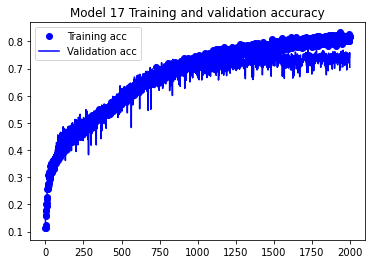

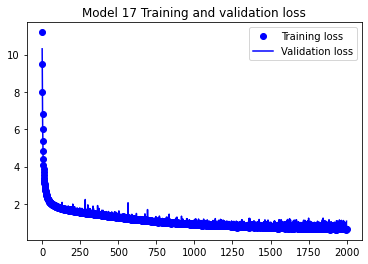

In [315]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 17 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 17 Training and validation loss')
plt.legend()

plt.show()

In [316]:
# Save the Model
model.save('food_model_17.h5')

In [317]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
  ...
    to  
  ['...']
test acc: 0.726


### Model #20 (VGG16)

#### VGG16 and 1 Dense Layer + Dropout + Learning Rate

In [4]:
# Import pre-trained model (VGG16)
from tensorflow.keras.applications import VGG16
img_size = 150

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [188]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [191]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, 10))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 7500)
validation_features, validation_labels = extract_features(validation_dir, 2000)
test_features, test_labels = extract_features(test_dir, 500)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [192]:
print(train_features.shape)
print(train_labels.shape)
print(validation_features.shape)
print(validation_labels.shape)

(7500, 4, 4, 512)
(7500, 10)
(2000, 4, 4, 512)
(2000, 10)


In [193]:
# Flatten
train_features = np.reshape(train_features, (7500, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (2000, 4 * 4 * 512))
test_features = np.reshape(test_features, (500, 4 * 4 * 512))

In [194]:
print(train_features.shape)
print(train_labels.shape)
print(validation_features.shape)
print(validation_labels.shape)

(7500, 8192)
(7500, 10)
(2000, 8192)
(2000, 10)


In [195]:
# Build the Model
model = models.Sequential()

# 1st Dense Network
model.add(layers.Dense(256, activation='relu', input_shape=(4 * 4 * 512,)))

# Add Dropout
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [196]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 10)                2570      
Total params: 2,099,978
Trainable params: 2,099,978
Non-trainable params: 0
_________________________________________________________________


In [197]:
# Compile the Model
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [198]:
# Train the Model
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 7500 samples, validate on 2000 samples
Epoch 1/30
7500/7500 [==============================] - 2s 289us/sample - loss: 2.0094 - acc: 0.2889 - val_loss: 1.5997 - val_acc: 0.4860
Epoch 2/30
7500/7500 [==============================] - 2s 212us/sample - loss: 1.5436 - acc: 0.4708 - val_loss: 1.3531 - val_acc: 0.5590
Epoch 3/30
7500/7500 [==============================] - 2s 212us/sample - loss: 1.3491 - acc: 0.5365 - val_loss: 1.2418 - val_acc: 0.5920
Epoch 4/30
7500/7500 [==============================] - 2s 212us/sample - loss: 1.2337 - acc: 0.5855 - val_loss: 1.1722 - val_acc: 0.6160
Epoch 5/30
7500/7500 [==============================] - 2s 220us/sample - loss: 1.1449 - acc: 0.6121 - val_loss: 1.1254 - val_acc: 0.6330
Epoch 6/30
7500/7500 [==============================] - 2s 218us/sample - loss: 1.0803 - acc: 0.6429 - val_loss: 1.0898 - val_acc: 0.6485
Epoch 7/30
7500/7500 [==============================] - 2s 215us/sample - loss: 1.0184 - acc: 0.6631 - val_loss: 1.0693 - va

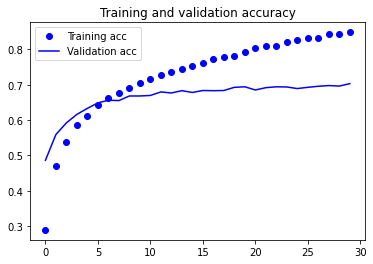

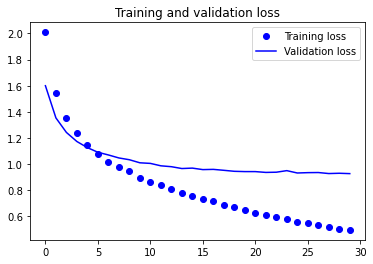

In [199]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [201]:
# Save the Model
model.save('food_model_20.h5')

### Model #21

#### VGG16 and 1 Dense Layer + Dropout + Learning Rate + Data Augmentation

In [202]:
# Build the Model
model = models.Sequential()
model.add(conv_base) # VGG16 pretrained
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [203]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_13 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_68 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_69 (Dense)             (None, 10)                2570      
Total params: 16,814,666
Trainable params: 16,814,666
Non-trainable params: 0
_________________________________________________________________


In [204]:
conv_base.trainable = False

In [205]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_13 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_68 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_69 (Dense)             (None, 10)                2570      
Total params: 16,814,666
Trainable params: 2,099,978
Non-trainable params: 14,714,688
_________________________________________________________________


In [206]:
# Data Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [207]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 27s 272ms/step - loss: 2.1585 - acc: 0.2155 - val_loss: 1.9327 - val_acc: 0.3400
Epoch 2/30
100/100 [==============================] - 26s 257ms/step - loss: 1.8493 - acc: 0.3810 - val_loss: 1.7058 - val_acc: 0.4240
Epoch 3/30
100/100 [==============================] - 26s 257ms/step - loss: 1.6642 - acc: 0.4475 - val_loss: 1.5379 - val_acc: 0.4820
Epoch 4/30
100/100 [==============================] - 26s 261ms/step - loss: 1.5564 - acc: 0.4815 - val_loss: 1.4522 - val_acc: 0.5010
Epoch 5/30
100/100 [==============================] - 26s 255ms/step - loss: 1.4754 - acc: 0.5025 - val_loss: 1.3719 - val_acc: 0.5340
Epoch 6/30
100/100 [==============================] - 25s 254ms/step - loss: 1.4318 - acc: 0.5245 - val_loss: 1.3211 - val_acc: 0.5360
Epoch 7/30
100/100 [==============================] - 26s 258ms/step - loss: 1.3560 - acc: 0.5510

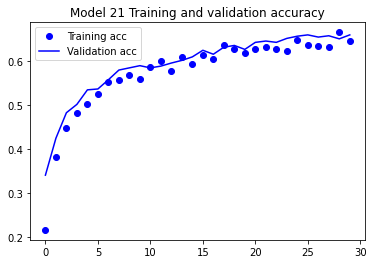

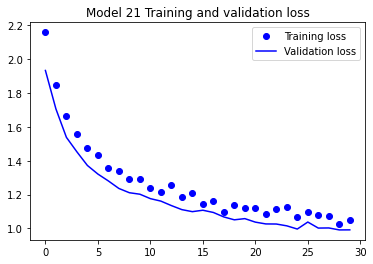

In [208]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 21 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 21 Training and validation loss')
plt.legend()

plt.show()

In [209]:
# Save the Model
model.save('food_model_21.h5')

In [211]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
  ...
    to  
  ['...']
test acc: 0.635


### Model #22

#### VGG16 (unfreeze block 5) and 1 Dense Layer + Learning Rate + Data Augmentation

In [212]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [213]:
# Build the model
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False     

In [214]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              # reduce learning rate
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [215]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_13 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_68 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_69 (Dense)             (None, 10)                2570      
Total params: 16,814,666
Trainable params: 9,179,402
Non-trainable params: 7,635,264
_________________________________________________________________


In [216]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [217]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 28s 275ms/step - loss: 1.0329 - acc: 0.6460 - val_loss: 0.9313 - val_acc: 0.6670
Epoch 2/100
100/100 [==============================] - 25s 253ms/step - loss: 0.9765 - acc: 0.6700 - val_loss: 0.9247 - val_acc: 0.6860
Epoch 3/100
100/100 [==============================] - 26s 257ms/step - loss: 0.9876 - acc: 0.6805 - val_loss: 0.8733 - val_acc: 0.6990
Epoch 4/100
100/100 [==============================] - 26s 258ms/step - loss: 0.9238 - acc: 0.6990 - val_loss: 0.8971 - val_acc: 0.6990
Epoch 5/100
100/100 [==============================] - 25s 254ms/step - loss: 0.8847 - acc: 0.7055 - val_loss: 0.8432 - val_acc: 0.7210
Epoch 6/100
100/100 [==============================] - 26s 256ms/step - loss: 0.8760 - acc: 0.7115 - val_loss: 0.8265 - val_acc: 0.7260
Epoch 7/100
100/100 [==============================] - 25s 253ms/step - loss: 0.8932 - acc:

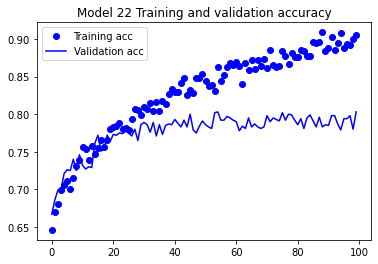

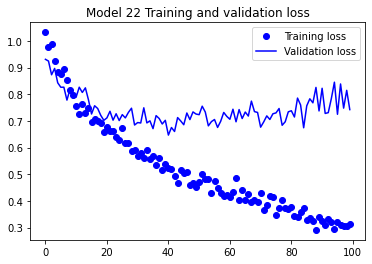

In [218]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 22 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 22 Training and validation loss')
plt.legend()

plt.show()

In [219]:
# Save the Model
model.save('food_model_22.h5')

In [220]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
  ...
    to  
  ['...']
test acc: 0.796


### Model #23

#### VGG16 (unfreeze block 5) and 2 Dense Layer + Learning Rate + Data Augmentation + L1 and L2 regularizers + Dropout

In [221]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [223]:
# Build the Model
model = models.Sequential()
model.add(conv_base) # VGG16 pretrained

# Flatten
model.add(layers.Flatten())

# 1st Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# Add Dropout
model.add(layers.Dropout(0.5))

# 2nd Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [224]:
model.compile(loss='categorical_crossentropy',
              # reduce learning rate
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [225]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_14 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_70 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_72 (Dense)             (None, 10)                2570      
Total params: 16,880,458
Trainable params: 9,245,194
Non-trainable params: 7,635,264
__________________________________

In [226]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [227]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 27s 273ms/step - loss: 33.9572 - acc: 0.1705 - val_loss: 33.0500 - val_acc: 0.4370
Epoch 2/100
100/100 [==============================] - 25s 254ms/step - loss: 32.6063 - acc: 0.3555 - val_loss: 31.7415 - val_acc: 0.5760
Epoch 3/100
100/100 [==============================] - 26s 259ms/step - loss: 31.5310 - acc: 0.4665 - val_loss: 30.7431 - val_acc: 0.6370
Epoch 4/100
100/100 [==============================] - 26s 261ms/step - loss: 30.6844 - acc: 0.5115 - val_loss: 29.9747 - val_acc: 0.6570
Epoch 5/100
100/100 [==============================] - 26s 257ms/step - loss: 29.8974 - acc: 0.5690 - val_loss: 29.2646 - val_acc: 0.6820
Epoch 6/100
100/100 [==============================] - 26s 260ms/step - loss: 29.1067 - acc: 0.6260 - val_loss: 28.5607 - val_acc: 0.6900
Epoch 7/100
100/100 [==============================] - 26s 256ms/step - loss: 2

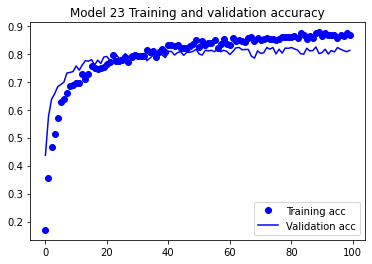

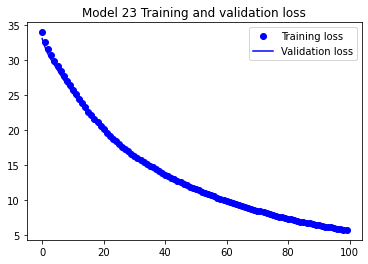

In [234]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 23 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 23 Training and validation loss')
plt.legend()

plt.show()

In [235]:
# Save the Model
model.save('food_model_23.h5')

In [236]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
  ...
    to  
  ['...']
test acc: 0.49


### Model #24

#### VGG16 (unfreeze block 5) and 2 Dense Layer + Learning Rate + Data Augmentation + L1 and L2 regularizers + Dropout (0.5 to 0.2)

In [286]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [287]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [288]:
# Unfreeze 5th Convolutional Network onwards
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False  

In [289]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [290]:
# Build the Model
model = models.Sequential()
model.add(conv_base) # VGG16 pretrained

# Flatten
model.add(layers.Flatten())

# 1st Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# Add Dropout (decrease dropout from 0.5 to 0.2)
model.add(layers.Dropout(0.2))

# 2nd Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [291]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              # reduce learning rate
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [292]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_15 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_92 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_94 (Dense)             (None, 10)                2570      
Total params: 16,880,458
Trainable params: 9,245,194
Non-trainable params: 7,635,264
__________________________________

In [293]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [294]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 28s 278ms/step - loss: 33.6519 - acc: 0.1775 - val_loss: 32.7316 - val_acc: 0.3060
Epoch 2/100
100/100 [==============================] - 27s 266ms/step - loss: 32.0763 - acc: 0.3185 - val_loss: 31.1936 - val_acc: 0.4600
Epoch 3/100
100/100 [==============================] - 26s 261ms/step - loss: 30.6878 - acc: 0.4500 - val_loss: 29.9631 - val_acc: 0.4880
Epoch 4/100
100/100 [==============================] - 26s 260ms/step - loss: 29.5837 - acc: 0.4720 - val_loss: 28.8753 - val_acc: 0.5330
Epoch 5/100
100/100 [==============================] - 26s 259ms/step - loss: 28.5162 - acc: 0.5225 - val_loss: 27.8472 - val_acc: 0.5560
Epoch 6/100
100/100 [==============================] - 26s 265ms/step - loss: 27.5331 - acc: 0.5340 - val_loss: 26.8682 - val_acc: 0.6070
Epoch 7/100
100/100 [==============================] - 26s 262ms/step - loss: 2

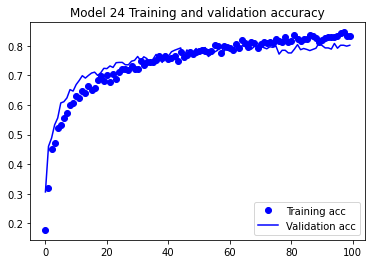

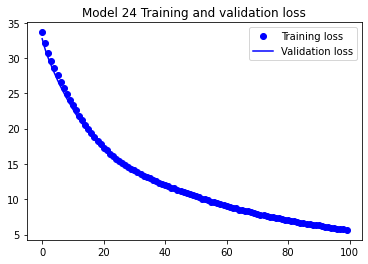

In [295]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 24 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 24 Training and validation loss')
plt.legend()

plt.show()

In [296]:
# Save the Model
model.save('food_model_24.h5')

In [297]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
  ...
    to  
  ['...']
test acc: 0.78


### Model #25

#### VGG16 (unfreeze block 5) and 3 Dense Layer + Data Augmentation + Learning Rate 

In [418]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [419]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [420]:
# Unfreeze 5th Convolutional Network onwards
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False  

In [421]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [422]:
# Build the Model
model = models.Sequential()
model.add(conv_base) # VGG16 pretrained

# Flatten
model.add(layers.Flatten())

# 1st Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# Add Dropout
model.add(layers.Dropout(0.5))

# 2nd Dense Network
model.add(layers.Dense(256, activation='relu'))

# 3rd Dense Network
model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [423]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              # reduce learning rate
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [424]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_25 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_126 (Dense)            (None, 256)               2097408   
_________________________________________________________________
dropout_37 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_127 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_128 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_129 (Dense)            (None, 10)              

In [425]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [455]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [427]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/200
100/100 [==============================] - 29s 289ms/step - loss: 29.8335 - acc: 0.1430 - val_loss: 28.9669 - val_acc: 0.3050
Epoch 2/200
100/100 [==============================] - 27s 267ms/step - loss: 28.2681 - acc: 0.2725 - val_loss: 27.4033 - val_acc: 0.4050
Epoch 3/200
100/100 [==============================] - 26s 265ms/step - loss: 26.8487 - acc: 0.3575 - val_loss: 26.0482 - val_acc: 0.4810
Epoch 4/200
100/100 [==============================] - 27s 268ms/step - loss: 25.6799 - acc: 0.4000 - val_loss: 24.9118 - val_acc: 0.5450
Epoch 5/200
100/100 [==============================] - 27s 269ms/step - loss: 24.5608 - acc: 0.4650 - val_loss: 23.8730 - val_acc: 0.5750
Epoch 6/200
100/100 [==============================] - 27s 265ms/step - loss: 23.5917 - acc: 0.5125 - val_loss: 22.9454 - val_acc: 0.5880
Epoch 7/200
100/100 [==============================] - 27s 267ms/step - loss: 2

Epoch 59/200
100/100 [==============================] - 26s 264ms/step - loss: 6.9161 - acc: 0.7875 - val_loss: 6.9723 - val_acc: 0.7680
Epoch 60/200
100/100 [==============================] - 27s 268ms/step - loss: 6.7981 - acc: 0.7845 - val_loss: 6.8687 - val_acc: 0.7610
Epoch 61/200
100/100 [==============================] - 26s 264ms/step - loss: 6.6929 - acc: 0.7860 - val_loss: 6.7549 - val_acc: 0.7630
Epoch 62/200
100/100 [==============================] - 26s 264ms/step - loss: 6.6242 - acc: 0.7835 - val_loss: 6.6670 - val_acc: 0.7610
Epoch 63/200
100/100 [==============================] - 26s 264ms/step - loss: 6.4653 - acc: 0.7955 - val_loss: 6.6603 - val_acc: 0.7410
Epoch 64/200
100/100 [==============================] - 27s 270ms/step - loss: 6.3952 - acc: 0.7730 - val_loss: 6.4471 - val_acc: 0.7620
Epoch 65/200
100/100 [==============================] - 26s 263ms/step - loss: 6.3077 - acc: 0.7840 - val_loss: 6.3202 - val_acc: 0.7690
Epoch 66/200
100/100 [===================

100/100 [==============================] - 26s 264ms/step - loss: 1.4131 - acc: 0.8770 - val_loss: 1.7598 - val_acc: 0.7890
Epoch 178/200
100/100 [==============================] - 26s 265ms/step - loss: 1.3825 - acc: 0.8730 - val_loss: 1.7132 - val_acc: 0.8000
Epoch 179/200
100/100 [==============================] - 27s 266ms/step - loss: 1.3437 - acc: 0.8840 - val_loss: 1.7563 - val_acc: 0.8030
Epoch 180/200
100/100 [==============================] - 26s 264ms/step - loss: 1.3695 - acc: 0.8820 - val_loss: 1.6869 - val_acc: 0.8160
Epoch 181/200
100/100 [==============================] - 26s 264ms/step - loss: 1.3367 - acc: 0.8805 - val_loss: 1.7074 - val_acc: 0.8010
Epoch 182/200
100/100 [==============================] - 27s 268ms/step - loss: 1.3553 - acc: 0.8675 - val_loss: 1.7104 - val_acc: 0.7950
Epoch 183/200
100/100 [==============================] - 27s 265ms/step - loss: 1.3497 - acc: 0.8715 - val_loss: 1.7671 - val_acc: 0.7820
Epoch 184/200
100/100 [=========================

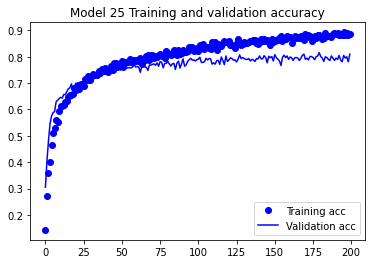

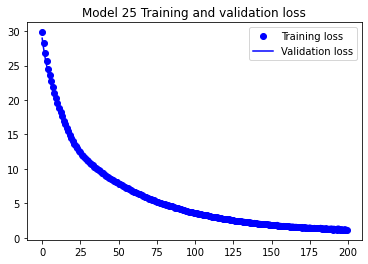

In [428]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 25 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 25 Training and validation loss')
plt.legend()

plt.show()

In [429]:
# Save the Model
model.save('food_model_25.h5')

In [430]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
  ...
    to  
  ['...']
test acc: 0.802


### Model #26

#### VGG16 (unfreeze block 5) and 3 Dense Layer + Data Augmentation + Learning Rate + L1 and L2 regularizers + Dropout (too all 3 fully connected layer)

In [6]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [8]:
# Unfreeze 5th Convolutional Network onwards
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False  

In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [10]:
# Build the Model
model = models.Sequential()
model.add(conv_base) # VGG16 pretrained

# Flatten
model.add(layers.Flatten())

# 1st Dense Network (Add L1 and L2 Weight Regularizers)
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# Add Dropout
model.add(layers.Dropout(0.5))

# 2nd Dense Network
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# Add Dropout
model.add(layers.Dropout(0.5))

# 3rd Dense Network
model.add(layers.Dense(256, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# Add Dropout
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

In [11]:
# Compile the Model
model.compile(loss='categorical_crossentropy',
              # reduce learning rate
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6

In [13]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [14]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [15]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/200
100/100 [==============================] - 29s 294ms/step - loss: 37.7631 - acc: 0.1045 - val_loss: 36.8744 - val_acc: 0.1620
Epoch 2/200
100/100 [==============================] - 26s 258ms/step - loss: 36.2853 - acc: 0.0995 - val_loss: 35.4513 - val_acc: 0.2110
Epoch 3/200
100/100 [==============================] - 26s 259ms/step - loss: 34.8334 - acc: 0.1220 - val_loss: 34.0413 - val_acc: 0.2430
Epoch 4/200
100/100 [==============================] - 25s 252ms/step - loss: 33.4360 - acc: 0.1290 - val_loss: 32.6784 - val_acc: 0.2820
Epoch 5/200
100/100 [==============================] - 25s 253ms/step - loss: 32.1000 - acc: 0.1510 - val_loss: 31.3551 - val_acc: 0.2690
Epoch 6/200
100/100 [==============================] - 24s 245ms/step - loss: 30.8024 - acc: 0.1555 - val_loss: 30.0537 - val_acc: 0.2970
Epo

Epoch 116/200
100/100 [==============================] - 24s 240ms/step - loss: 6.8802 - acc: 0.7220 - val_loss: 6.7743 - val_acc: 0.7710
Epoch 117/200
100/100 [==============================] - 24s 240ms/step - loss: 6.8233 - acc: 0.7305 - val_loss: 6.6904 - val_acc: 0.7830
Epoch 118/200
100/100 [==============================] - 24s 240ms/step - loss: 6.8133 - acc: 0.7175 - val_loss: 6.6749 - val_acc: 0.7810
Epoch 119/200
100/100 [==============================] - 24s 244ms/step - loss: 6.7489 - acc: 0.7235 - val_loss: 6.5968 - val_acc: 0.7760
Epoch 120/200
100/100 [==============================] - 24s 240ms/step - loss: 6.7146 - acc: 0.7325 - val_loss: 6.5671 - val_acc: 0.7780
Epoch 121/200
100/100 [==============================] - 24s 242ms/step - loss: 6.6697 - acc: 0.7370 - val_loss: 6.6039 - val_acc: 0.7550
Epoch 122/200
100/100 [==============================] - 24s 242ms/step - loss: 6.6405 - acc: 0.7285 - val_loss: 6.5410 - val_acc: 0.7630
Epoch 123/200
100/100 [===========

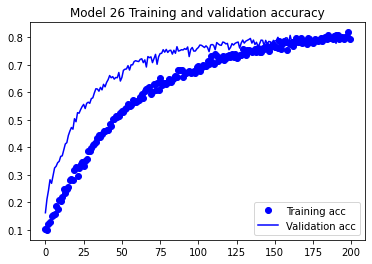

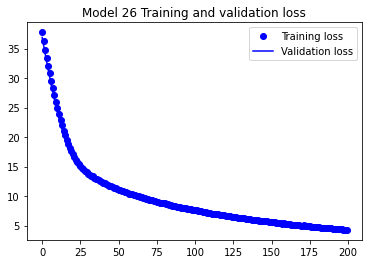

In [16]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 26 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 26 Training and validation loss')
plt.legend()

plt.show()

In [17]:
# Save the Model
model.save('food_model_26.h5')

In [18]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.8


### Model #30 (InceptionV3)

#### InceptionV3 and 1 Dense Layer + Dropout + Learning Rate

In [6]:
from tensorflow.keras.applications import InceptionV3
img_size = 150

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [7]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [8]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 3, 3, 2048))
    labels = np.zeros(shape=(sample_count, 10))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 7500)
validation_features, validation_labels = extract_features(validation_dir, 2000)
test_features, test_labels = extract_features(test_dir, 500)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [9]:
print(train_features.shape)
print(train_labels.shape)
print(validation_features.shape)
print(validation_labels.shape)

(7500, 3, 3, 2048)
(7500, 10)
(2000, 3, 3, 2048)
(2000, 10)


In [10]:
train_features = np.reshape(train_features, (7500, 3 * 3 * 2048))
validation_features = np.reshape(validation_features, (2000, 3 * 3 * 2048))
test_features = np.reshape(test_features, (500, 3 * 3 * 2048))

In [11]:
print(train_features.shape)
print(train_labels.shape)
print(validation_features.shape)
print(validation_labels.shape)

(7500, 18432)
(7500, 10)
(2000, 18432)
(2000, 10)


In [12]:
# Build the Model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(3 * 3 * 2048,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               4718848   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 4,721,418
Trainable params: 4,721,418
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [15]:
# Train the Model
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 7500 samples, validate on 2000 samples
Epoch 1/30
7500/7500 [==============================] - 3s 391us/sample - loss: 1.6683 - acc: 0.4893 - val_loss: 0.9717 - val_acc: 0.6765
Epoch 2/30
7500/7500 [==============================] - 2s 325us/sample - loss: 1.0367 - acc: 0.6639 - val_loss: 0.8789 - val_acc: 0.7075
Epoch 3/30
7500/7500 [==============================] - 2s 326us/sample - loss: 0.8649 - acc: 0.7187 - val_loss: 0.8352 - val_acc: 0.7320
Epoch 4/30
7500/7500 [==============================] - 2s 333us/sample - loss: 0.7381 - acc: 0.7593 - val_loss: 0.8365 - val_acc: 0.7390
Epoch 5/30
7500/7500 [==============================] - 2s 331us/sample - loss: 0.6541 - acc: 0.7863 - val_loss: 0.8732 - val_acc: 0.7330
Epoch 6/30
7500/7500 [==============================] - 2s 328us/sample - loss: 0.5683 - acc: 0.8129 - val_loss: 0.8460 - val_acc: 0.7365
Epoch 7/30
7500/7500 [==============================] - 2s 328us/sample - loss: 0.4985 - acc: 0.8364 - val_loss: 0.8547 - va

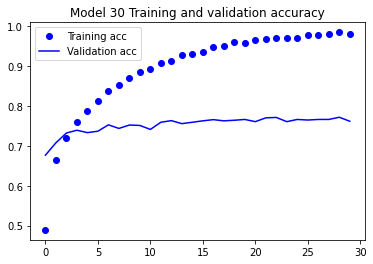

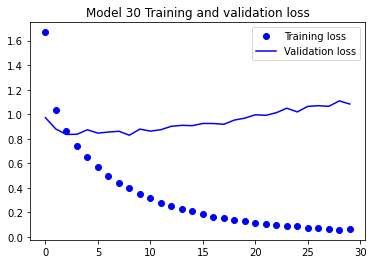

In [16]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 30 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 30 Training and validation loss')
plt.legend()

plt.show()

In [17]:
# Save the Model
model.save('food_model_30.h5')

### Model #31

#### InceptionV3 and 1 Dense Layer + Data Augmentation + Learning Rate

In [26]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [27]:
# Build the Model
model = models.Sequential()
model.add(conv_base) # InceptionV3

# Flatten
model.add(layers.Flatten())

# 1st Dense Network
model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 26,524,202
Trainable params: 4,721,418
Non-trainable params: 21,802,784
_________________________________________________________________


In [29]:
conv_base.trainable = False

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 26,524,202
Trainable params: 4,721,418
Non-trainable params: 21,802,784
_________________________________________________________________


In [31]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [32]:
# Data Augumentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [33]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 32s 323ms/step - loss: 2.1580 - acc: 0.2370 - val_loss: 2.8994 - val_acc: 0.2640
Epoch 2/30
100/100 [==============================] - 25s 251ms/step - loss: 1.8967 - acc: 0.3550 - val_loss: 3.3898 - val_acc: 0.3220
Epoch 3/30
100/100 [==============================] - 25s 252ms/step - loss: 1.7183 - acc: 0.4215 - val_loss: 2.4341 - val_acc: 0.4610
Epoch 4/30
100/100 [==============================] - 26s 256ms/step - loss: 1.6256 - acc: 0.4665 - val_loss: 3.2742 - val_acc: 0.3970
Epoch 5/30
100/100 [==============================] - 25s 253ms/step - loss: 1.5341 - acc: 0.4995 - val_loss: 3.6288 - val_acc: 0.4040
Epoch 6/30
100/100 [==============================] - 25s 251ms/step - loss: 1.4863 - acc: 0.5090 - val_loss: 2.6914 - val_acc: 0.4830
Epoch 7/30
100/100 [==============================] - 25s 251ms/step - loss: 1.4298 - acc: 0.5365

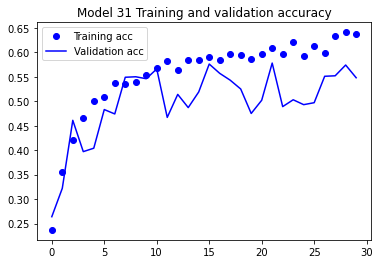

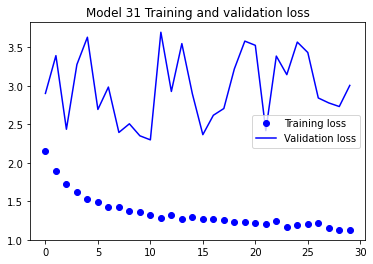

In [34]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 31 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 31 Training and validation loss')
plt.legend()

plt.show()

In [35]:
# Save the Model
model.save('food_model_31.h5')

### Model #32

#### InceptionV3 (Unfreeze mixed 8, 9 and 10) and 1 Dense Layer + Data Augmentation + Learning Rate

In [25]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [26]:
for i, layer in enumerate(conv_base.layers):
   print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [27]:
# Freeze the first 249 layers and unfreeze the rest (mixed 8 onwards):
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed8':
        set_trainable = True 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False    

In [28]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [29]:
# Build the Model
model = models.Sequential()
model.add(conv_base) # InceptionV3

# Flatten
model.add(layers.Flatten())

# 1st Dense Network
model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 26,524,202
Trainable params: 15,836,298
Non-trainable params: 10,687,904
_________________________________________________________________


In [34]:
from tensorflow.keras.optimizers import SGD
# Compile the Model
model.compile(loss='categorical_crossentropy',
              # change learning rate to SGD
              optimizer=SGD(lr=0.0001, momentum=0.9),
              metrics=['acc'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 26,524,202
Trainable params: 15,836,298
Non-trainable params: 10,687,904
_________________________________________________________________


In [36]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [37]:
# Data Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [38]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 33s 333ms/step - loss: 2.2715 - acc: 0.1760 - val_loss: 2.2672 - val_acc: 0.2880
Epoch 2/100
100/100 [==============================] - 26s 257ms/step - loss: 1.9432 - acc: 0.3340 - val_loss: 1.9650 - val_acc: 0.3930
Epoch 3/100
100/100 [==============================] - 26s 257ms/step - loss: 1.7255 - acc: 0.4260 - val_loss: 1.7277 - val_acc: 0.4680
Epoch 4/100
100/100 [==============================] - 25s 253ms/step - loss: 1.5551 - acc: 0.4975 - val_loss: 1.7587 - val_acc: 0.4840
Epoch 5/100
100/100 [==============================] - 26s 258ms/step - loss: 1.4826 - acc: 0.5005 - val_loss: 1.8263 - val_acc: 0.5080
Epoch 6/100
100/100 [==============================] - 25s 250ms/step - loss: 1.4114 - acc: 0.5380 - val_loss: 1.6579 - val_acc: 0.5590
Epoch 7/100
100/100 [==============================] - 25s 249ms/step - loss: 1.3050 - acc:

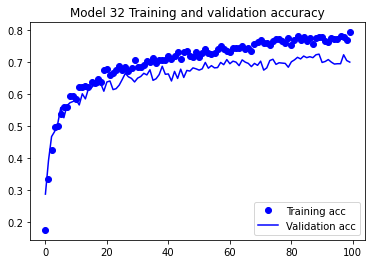

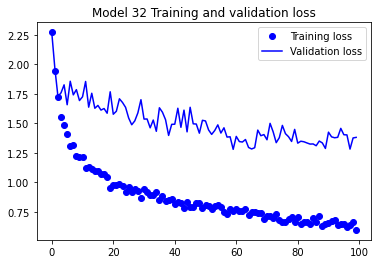

In [39]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 32 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 32 Training and validation loss')
plt.legend()

plt.show()

In [40]:
# Save the Model
model.save('food_model_32.h5')

### Model #33

#### InceptionV3 (Unfreeze mixed 8, 9 and 10) and 2 Dense Layer (increased nodes) + Data Augmentation + Learning Rate + L1 and L2 regularizers + Dropout 

In [41]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [42]:
# Build the Model
model = models.Sequential()
model.add(conv_base) # InceptionV3

# Flatten
model.add(layers.Flatten())

# 1st Dense Network
model.add(layers.Dense(256,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# Add Dropout
model.add(layers.Dropout(0.5))

# 2nd Dense Network
model.add(layers.Dense(256,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# Add Dropout
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

In [43]:
model.compile(loss='categorical_crossentropy',
              # reduce learning rate
              optimizer=SGD(lr=0.0001, momentum=0.9),
              metrics=['acc'])

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [45]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [46]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 34s 336ms/step - loss: 48.8523 - acc: 0.1555 - val_loss: 48.2020 - val_acc: 0.2590
Epoch 2/100
100/100 [==============================] - 25s 255ms/step - loss: 48.0384 - acc: 0.2360 - val_loss: 47.4261 - val_acc: 0.3540
Epoch 3/100
100/100 [==============================] - 25s 249ms/step - loss: 47.4212 - acc: 0.2855 - val_loss: 46.7397 - val_acc: 0.4500
Epoch 4/100
100/100 [==============================] - 25s 249ms/step - loss: 46.7921 - acc: 0.3555 - val_loss: 46.1477 - val_acc: 0.4780
Epoch 5/100
100/100 [==============================] - 25s 253ms/step - loss: 46.1682 - acc: 0.4015 - val_loss: 45.6622 - val_acc: 0.4730
Epoch 6/100
100/100 [==============================] - 25s 249ms/step - loss: 45.5921 - acc: 0.4395 - val_loss: 45.1322 - val_acc: 0.5080
Epoch 7/100
100/100 [==============================] - 25s 249ms/step - loss: 4

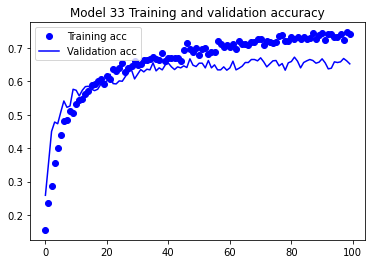

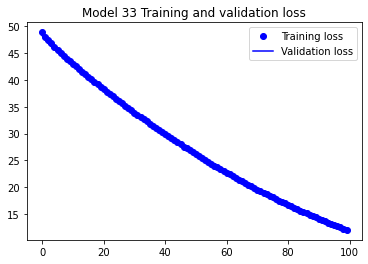

In [47]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 33 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 33 Training and validation loss')
plt.legend()

plt.show()

In [48]:
# Save the Model
model.save('food_model_33.h5')

### Model #34

#### InceptionV3 (Unfreeze mixed 8, 9 and 10) and 3 Dense Layer (increased nodes) + Data Augmentation + Learning Rate + L1 and L2 regularizers + Dropout 

In [49]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [50]:
# Build the Model
model = models.Sequential()
model.add(conv_base) # InceptionV3

# Flatten
model.add(layers.Flatten())

# 1st Dense Network
model.add(layers.Dense(256,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# Add Dropout
model.add(layers.Dropout(0.5))

# 2nd Dense Network
model.add(layers.Dense(256,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# Add Dropout
model.add(layers.Dropout(0.5))

# 3rd Dense Network
model.add(layers.Dense(512,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# Add Dropout
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

In [51]:
model.compile(loss='categorical_crossentropy',
              # reduce learning rate
              optimizer=SGD(lr=0.0001, momentum=0.9),
              metrics=['acc'])

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)              

In [53]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [54]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 33s 335ms/step - loss: 54.9874 - acc: 0.1230 - val_loss: 54.3995 - val_acc: 0.2610
Epoch 2/100
100/100 [==============================] - 25s 252ms/step - loss: 54.2510 - acc: 0.1950 - val_loss: 53.7403 - val_acc: 0.3760
Epoch 3/100
100/100 [==============================] - 26s 256ms/step - loss: 53.6528 - acc: 0.2215 - val_loss: 53.0854 - val_acc: 0.4770
Epoch 4/100
100/100 [==============================] - 25s 248ms/step - loss: 53.0578 - acc: 0.2590 - val_loss: 52.4545 - val_acc: 0.5140
Epoch 5/100
100/100 [==============================] - 25s 249ms/step - loss: 52.4621 - acc: 0.3025 - val_loss: 51.8343 - val_acc: 0.5530
Epoch 6/100
100/100 [==============================] - 25s 249ms/step - loss: 51.9052 - acc: 0.3405 - val_loss: 51.2304 - val_acc: 0.5650
Epoch 7/100
100/100 [==============================] - 25s 255ms/step - loss: 5

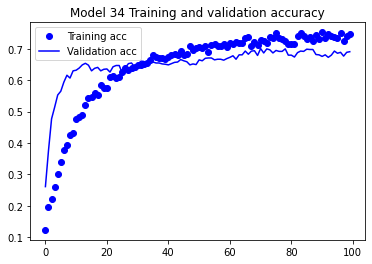

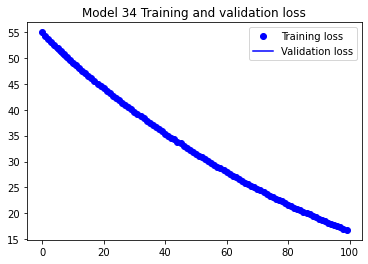

In [55]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 34 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 34 Training and validation loss')
plt.legend()

plt.show()

In [56]:
# Save the Model
model.save('food_model_34.h5')

### Model #35

#### InceptionV3 (Unfreeze mixed 8, 9 and 10) and 3 Dense Layer (increased nodes) + Data Augmentation + Learning Rate + L2 regularizers (decrease from 0.001 to 0.01) + Dropout 


In [42]:
# Build the Model
model = models.Sequential()
model.add(conv_base) # InceptionV3

# Flatten
model.add(layers.Flatten())

# 1st Dense Network
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.01), activation='relu'))

# Add Dropout
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

In [43]:
from tensorflow.keras.optimizers import SGD
# Compile the Model
model.compile(loss='categorical_crossentropy',
              # change learning rate to SGD
              optimizer=SGD(lr=0.0001, momentum=0.9),
              metrics=['acc'])

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_4 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 26,524,202
Trainable params: 15,836,298
Non-trainable params: 10,687,904
_________________________________________________________________


In [45]:
# Data Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [46]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 34s 338ms/step - loss: 7.5065 - acc: 0.1560 - val_loss: 7.2826 - val_acc: 0.2830
Epoch 2/100
100/100 [==============================] - 26s 263ms/step - loss: 7.1543 - acc: 0.2370 - val_loss: 7.0986 - val_acc: 0.3090
Epoch 3/100
100/100 [==============================] - 25s 249ms/step - loss: 7.0166 - acc: 0.2900 - val_loss: 6.7406 - val_acc: 0.4180
Epoch 4/100
100/100 [==============================] - 25s 248ms/step - loss: 6.8913 - acc: 0.3280 - val_loss: 6.5714 - val_acc: 0.4610
Epoch 5/100
100/100 [==============================] - 25s 250ms/step - loss: 6.7840 - acc: 0.3725 - val_loss: 6.4354 - val_acc: 0.5040
Epoch 6/100
100/100 [==============================] - 25s 254ms/step - loss: 6.7106 - acc: 0.3880 - val_loss: 6.4783 - val_acc: 0.4980
Epoch 7/100
100/100 [==============================] - 26s 255ms/step - loss: 6.6024 - acc:

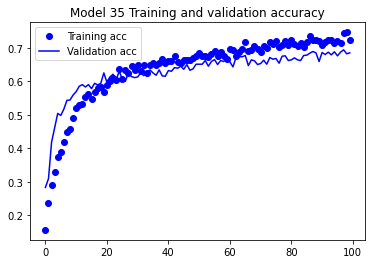

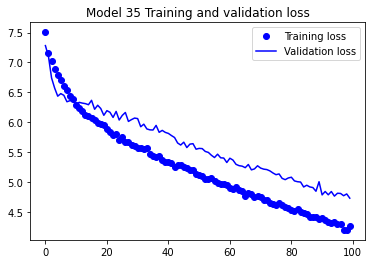

In [47]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 35 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 35 Training and validation loss')
plt.legend()

plt.show()

In [48]:
# Save the Model
model.save('food_model_35.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [4]:
img_size = 150
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 500 images belonging to 10 classes.


In [82]:
# Model #1
model = tf.keras.models.load_model('food_model_1.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 31.50%


In [83]:
# Model #2
model = tf.keras.models.load_model('food_model_2.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 33.00%


In [84]:
# Model #3
model = tf.keras.models.load_model('food_model_3.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 40.50%


In [85]:
# Model #4
model = tf.keras.models.load_model('food_model_4.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 45.50%


In [86]:
# Model #5
model = tf.keras.models.load_model('food_model_5.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 49.00%


In [87]:
# Model #6
model = tf.keras.models.load_model('food_model_6.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 46.00%


In [88]:
# Model #7
model = tf.keras.models.load_model('food_model_7.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 45.00%


In [89]:
# Model #8
model = tf.keras.models.load_model('food_model_8.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 44.50%


In [90]:
# Model #9
model = tf.keras.models.load_model('food_model_9.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 44.00%


In [91]:
# Model #10
model = tf.keras.models.load_model('food_model_10.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 50.00%


In [92]:
# Model #11
model = tf.keras.models.load_model('food_model_11.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 55.00%


In [93]:
# Model #12
model = tf.keras.models.load_model('food_model_12.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 42.00%


In [94]:
# Model #13
model = tf.keras.models.load_model('food_model_13.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 48.50%


In [95]:
# Model #14
model = tf.keras.models.load_model('food_model_14.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 70.50%


In [96]:
# Model #15
model = tf.keras.models.load_model('food_model_15.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 66.00%


In [97]:
# Model #16
model = tf.keras.models.load_model('food_model_16.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 72.50%


In [98]:
# Model #17
model = tf.keras.models.load_model('food_model_17.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 72.50%


In [102]:
# Model #20
model = tf.keras.models.load_model('food_model_20.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']


ValueError: in converted code:

    C:\Users\victo\anaconda3\envs\test\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py:677 map_fn
        batch_size=None)
    C:\Users\victo\anaconda3\envs\test\lib\site-packages\tensorflow_core\python\keras\engine\training.py:2410 _standardize_tensors
        exception_prefix='input')
    C:\Users\victo\anaconda3\envs\test\lib\site-packages\tensorflow_core\python\keras\engine\training_utils.py:573 standardize_input_data
        'with shape ' + str(data_shape))

    ValueError: Error when checking input: expected dense_66_input to have 2 dimensions, but got array with shape (None, None, None, None)


In [103]:
# Model #21
model = tf.keras.models.load_model('food_model_21.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

OSError: SavedModel file does not exist at: food_model_21.h5/{saved_model.pbtxt|saved_model.pb}

In [104]:
# Model #22
model = tf.keras.models.load_model('food_model_22.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 79.50%


In [105]:
# Model #23
model = tf.keras.models.load_model('food_model_23.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 50.50%


In [106]:
# Model #24
model = tf.keras.models.load_model('food_model_24.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 78.50%


In [101]:
# Model #25
model = tf.keras.models.load_model('food_model_25.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 80.00%


In [6]:
# Model #26
import tensorflow as tf
model = tf.keras.models.load_model('food_model_26.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 83.00%


In [107]:
# Model #30
model = tf.keras.models.load_model('food_model_30.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']


ValueError: in converted code:

    C:\Users\victo\anaconda3\envs\test\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py:677 map_fn
        batch_size=None)
    C:\Users\victo\anaconda3\envs\test\lib\site-packages\tensorflow_core\python\keras\engine\training.py:2410 _standardize_tensors
        exception_prefix='input')
    C:\Users\victo\anaconda3\envs\test\lib\site-packages\tensorflow_core\python\keras\engine\training_utils.py:573 standardize_input_data
        'with shape ' + str(data_shape))

    ValueError: Error when checking input: expected dense_input to have 2 dimensions, but got array with shape (None, None, None, None)


In [108]:
# Model #31
model = tf.keras.models.load_model('food_model_31.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 53.50%


In [109]:
# Model #32
model = tf.keras.models.load_model('food_model_32.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 64.00%


In [110]:
# Model #33
model = tf.keras.models.load_model('food_model_33.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 66.00%


In [6]:
# Model #34
model = tf.keras.models.load_model('food_model_34.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test accuracy: 72.50%


In [7]:
# Model #35
model = tf.keras.models.load_model('food_model_35.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

  ...
    to  
  ['...']
test accuracy: 76.00%


## Step 4  – Use the best model to make prediction

In [5]:
import tensorflow

# Load the best model
model = tensorflow.keras.models.load_model('food_model_26.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print("test accuracy: {:5.2f}%".format(100 * test_acc))

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test accuracy: 84.00%


In [6]:
print(tensorflow.version.VERSION)

2.1.0


In [7]:
# Load the food list (in alphabetical order)
with open('23.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beet_salad', 'ceviche', 'chicken_quesadilla', 'creme_brulee', 'garlic_bread', 'macaroni_and_cheese', 'miso_soup', 'pad_thai', 'shrimp_and_grits', 'sushi']


In [8]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

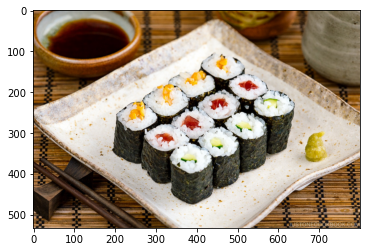

The prediction is:  sushi 

    beet_salad   ceviche  chicken_quesadilla  creme_brulee  garlic_bread  \
0    0.000005  0.000003        2.857398e-07  1.878839e-07  1.328215e-07   

   macaroni_and_cheese     miso_soup      pad_thai  shrimp_and_grits     sushi  
0         2.260727e-08  2.463613e-09  1.039404e-08      2.624815e-09  0.999992  


In [11]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'image1.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

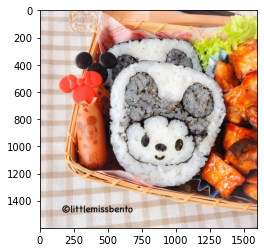

The prediction is:  sushi 

    beet_salad   ceviche  chicken_quesadilla  creme_brulee  garlic_bread  \
0     0.05481  0.069791             0.01855      0.024919      0.031668   

   macaroni_and_cheese  miso_soup  pad_thai  shrimp_and_grits     sushi  
0             0.011239   0.005792  0.006586          0.025788  0.750857  


In [9]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'image5.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

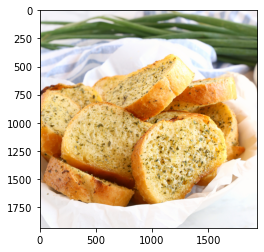

The prediction is:  garlic_bread 

      beet_salad       ceviche  chicken_quesadilla  creme_brulee  garlic_bread  \
0  2.184544e-10  4.459771e-09            0.000139  2.150800e-09      0.999861   

   macaroni_and_cheese     miso_soup      pad_thai  shrimp_and_grits  \
0         2.533126e-07  1.498811e-09  9.706181e-10      4.565725e-08   

          sushi  
0  3.316182e-08  


In [12]:
# Make prediction for the image you downloaded from internet
img = 'image2.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

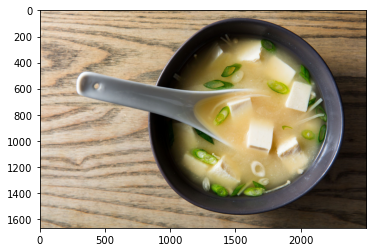

The prediction is:  miso_soup 

      beet_salad       ceviche  chicken_quesadilla  creme_brulee  garlic_bread  \
0  6.200786e-12  1.067547e-11        8.950566e-12  3.992036e-09  2.149058e-12   

   macaroni_and_cheese  miso_soup      pad_thai  shrimp_and_grits  \
0         1.046857e-10        1.0  1.458036e-12      5.738937e-12   

          sushi  
0  6.816271e-13  


In [13]:
# Make prediction for the image you downloaded from internet
img = 'image3.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

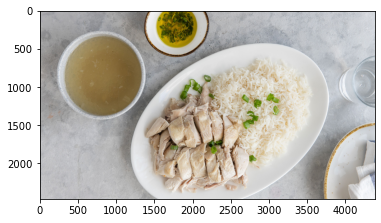

The prediction is:  chicken_quesadilla 

    beet_salad   ceviche  chicken_quesadilla  creme_brulee  garlic_bread  \
0     0.00375  0.020686            0.942464      0.001579       0.01328   

   macaroni_and_cheese  miso_soup  pad_thai  shrimp_and_grits     sushi  
0             0.002049   0.000756  0.004512          0.001917  0.009008  


In [14]:
# Make prediction for the image you downloaded from internet
img = 'image4.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)